In [11]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

# Função para calcular métricas
def calculate_metrics(y_true, y_pred):
    accuracy = np.mean(y_true == y_pred)
    conf_matrix = np.zeros((3, 3))
    for true, pred in zip(y_true, y_pred):
        conf_matrix[true, pred] += 1
    return accuracy, np.std(y_pred == y_true), conf_matrix

# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Holdout com 20 realizações
n_realizations = 20
accuracies_linear = []
accuracies_quadratic = []

for _ in range(n_realizations):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=None)

    # Calcular class priors
    class_priors = np.bincount(y_train) / len(y_train)

    # Calcular class means e variances
    class_means = [np.mean(X_train[y_train == i], axis=0) for i in range(3)]
    class_variances = [np.var(X_train[y_train == i], axis=0) for i in range(3)]

    # Discriminante Linear
    def linear_predict(X):
        predictions = []
        for x in X:
            class_scores = [np.dot(x - class_means[i], class_means[i]) for i in range(3)]
            predictions.append(np.argmax(class_scores))
        return predictions

    # Discriminante Quadrático
    def quadratic_predict(X):
        predictions = []
        for x in X:
            class_scores = [-0.5 * np.dot(np.dot((x - class_means[i]).T, np.linalg.inv(np.diag(class_variances[i]))), (x - class_means[i])) for i in range(3)]
            predictions.append(np.argmax(class_scores))
        return predictions

    # Fazer previsões no conjunto de teste
    y_pred_linear = linear_predict(X_test)
    y_pred_quadratic = quadratic_predict(X_test)

    # Calcular métricas para o discriminante linear
    accuracy_linear, std_dev_linear, conf_matrix_linear = calculate_metrics(y_test, y_pred_linear)
    accuracies_linear.append((accuracy_linear, std_dev_linear, conf_matrix_linear))

    # Calcular métricas para o discriminante quadrático
    accuracy_quadratic, std_dev_quadratic, conf_matrix_quadratic = calculate_metrics(y_test, y_pred_quadratic)
    accuracies_quadratic.append((accuracy_quadratic, std_dev_quadratic, conf_matrix_quadratic))

# Calcular média e desvio padrão das acurácias para o discriminante linear
mean_accuracies_linear = np.mean([acc[0] for acc in accuracies_linear])
std_accuracies_linear = np.std([acc[0] for acc in accuracies_linear])

# Calcular média e desvio padrão das acurácias para o discriminante quadrático
mean_accuracies_quadratic = np.mean([acc[0] for acc in accuracies_quadratic])
std_accuracies_quadratic = np.std([acc[0] for acc in accuracies_quadratic])

# Encontrar a melhor realização com base na acurácia mais próxima da média para o discriminante linear
best_realization_index_linear = np.argmin(np.abs([acc[0] - mean_accuracies_linear for acc in accuracies_linear]))
best_accuracy_linear, best_std_dev_linear, best_conf_matrix_linear = accuracies_linear[best_realization_index_linear]

# Encontrar a melhor realização com base na acurácia mais próxima da média para o discriminante quadrático
best_realization_index_quadratic = np.argmin(np.abs([acc[0] - mean_accuracies_quadratic for acc in accuracies_quadratic]))
best_accuracy_quadratic, best_std_dev_quadratic, best_conf_matrix_quadratic = accuracies_quadratic[best_realization_index_quadratic]

# Imprimir os resultados para o discriminante linear
print("Resultados do Discriminante Linear:")
print(f"Melhor Realização: {best_realization_index_linear}")
print(f"Acurácia: {best_accuracy_linear:.4f}")
print(f"Desvio Padrão: {best_std_dev_linear:.4f}")
print("Matriz de Confusão:")
print(best_conf_matrix_linear)

# Imprimir os resultados para o discriminante quadrático
print("\nResultados do Discriminante Quadrático:")
print(f"Melhor Realização: {best_realization_index_quadratic}")
print(f"Acurácia: {best_accuracy_quadratic:.4f}")
print(f"Desvio Padrão: {best_std_dev_quadratic:.4f}")
print("Matriz de Confusão:")
print(best_conf_matrix_quadratic)


Resultados do Discriminante Linear:
Melhor Realização: 2
Acurácia: 0.3333
Desvio Padrão: 0.4714
Matriz de Confusão:
[[15.  0.  0.]
 [12.  0.  0.]
 [15.  3.  0.]]

Resultados do Discriminante Quadrático:
Melhor Realização: 3
Acurácia: 0.9556
Desvio Padrão: 0.2061
Matriz de Confusão:
[[16.  0.  0.]
 [ 0. 10.  2.]
 [ 0.  0. 17.]]


Resultados do Discriminante Linear:
Melhor Realização: 0
Acurácia: 0.9556
Desvio Padrão: 0.2061
Matriz de Confusão:
[[13.  0.  0.]
 [ 0. 14.  1.]
 [ 0.  1. 16.]]
Covariance Matrix (Complete):
[[ 0.6729359  -0.05020513  1.26069231  0.51021795]
 [-0.05020513  0.17906227 -0.32928022 -0.12320696]
 [ 1.26069231 -0.32928022  3.08412637  1.28075824]
 [ 0.51021795 -0.12320696  1.28075824  0.57498535]]
Covariance Matrix (Diagonal):
[[0.6729359  0.         0.         0.        ]
 [0.         0.17906227 0.         0.        ]
 [0.         0.         3.08412637 0.        ]
 [0.         0.         0.         0.57498535]]
Covariance Matrix (Equal):
[[0.60056639 0.         0.         0.        ]
 [0.         0.60056639 0.         0.        ]
 [0.         0.         0.60056639 0.        ]
 [0.         0.         0.         0.60056639]]


NameError: name 'ListedColormap' is not defined

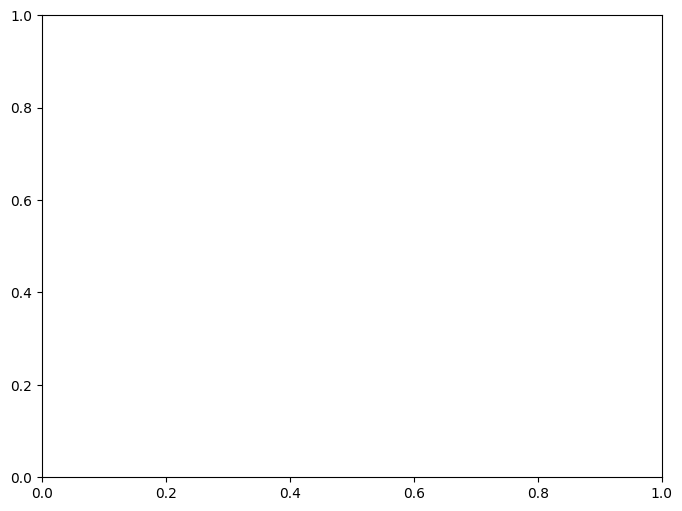

In [12]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

# Função para calcular métricas
def calculate_metrics(y_true, y_pred):
    accuracy = np.mean(y_true == y_pred)
    conf_matrix = np.zeros((3, 3))
    for true, pred in zip(y_true, y_pred):
        conf_matrix[true, pred] += 1
    return accuracy, np.std(y_pred == y_true), conf_matrix

# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Holdout com 20 realizações
n_realizations = 20
accuracies = []
for _ in range(n_realizations):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=None)

    # Calcular class priors
    class_priors = np.bincount(y_train) / len(y_train)

    # Calcular class means e variances
    class_means = [np.mean(X_train[y_train == i], axis=0) for i in range(3)]
    class_variances = [np.var(X_train[y_train == i], axis=0) for i in range(3)]

    # Função de previsão
    def predict(X):
        predictions = []
        for x in X:
            class_scores = [np.log(class_priors[i]) - 0.5 * np.sum(np.log(2 * np.pi * class_variances[i]))
                            - 0.5 * np.sum(((x - class_means[i]) ** 2) / class_variances[i]) for i in range(3)]
            predictions.append(np.argmax(class_scores))
        return predictions

    # Fazer previsões no conjunto de teste
    y_pred = predict(X_test)

    # Calcular métricas
    accuracy, std_dev, conf_matrix = calculate_metrics(y_test, y_pred)
    accuracies.append((accuracy, std_dev, conf_matrix, X_train))

# Calcular média e desvio padrão das acurácias
mean_accuracies = np.mean([acc[0] for acc in accuracies])
std_accuracies = np.std([acc[0] for acc in accuracies])

# Encontrar a melhor realização com base na acurácia mais próxima da média
best_realization_index = np.argmin(np.abs([acc[0] - mean_accuracies for acc in accuracies]))
best_accuracy, best_std_dev, best_conf_matrix, best_X_train = accuracies[best_realization_index]

# Imprimir os resultados do discriminante linear para a melhor realização
print("Resultados do Discriminante Linear:")
print(f"Melhor Realização: {best_realization_index}")
print(f"Acurácia: {best_accuracy:.4f}")
print(f"Desvio Padrão: {best_std_dev:.4f}")
print("Matriz de Confusão:")
print(best_conf_matrix)
print("Covariance Matrix (Complete):")
print(np.cov(best_X_train.T))
print("Covariance Matrix (Diagonal):")
print(np.diag(np.diag(np.cov(best_X_train.T))))
print("Covariance Matrix (Equal):")
print(np.mean(np.cov(best_X_train.T)) * np.eye(best_X_train.shape[1]))

# Função para plotar a superfície de decisão
def plot_decision_surface(X, y, means, variances, priors, ax):
    h = 0.02  # Passo do grid
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = predict(np.c_[xx.ravel(), yy.ravel()], means, variances, priors)
    Z = np.array(Z).reshape(xx.shape)
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    ax.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.8)
    ax.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', s=20)

# Função de previsão
def predict(X, means, variances, priors):
    predictions = []
    for x in X:
        class_scores = [np.log(priors[i]) - 0.5 * np.sum(np.log(2 * np.pi * variances[i]))
                        - 0.5 * np.sum(((x - means[i][:2]) ** 2) / variances[i][:2]) for i in range(3)]
        predictions.append(np.argmax(class_scores))
    return predictions

# Dados para plotagem
X_plot = best_X_train[:, :2]  # Usando apenas as duas primeiras características
y_plot = y_train

# Plotagem
fig, ax = plt.subplots(figsize=(8, 6))
plot_decision_surface(X_plot, y_plot, class_means, class_variances, class_priors, ax)
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Dataset - IRIS\nSuperfície de Decisão - Melhor Realização')
plt.show()


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# Load the Iris dataset
from sklearn.datasets import load_iris
iris = load_iris()
X, y = iris.data, iris.target

# Split the data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define custom colors for training and test points
train_colors = ['gold', 'limegreen', 'royalblue']
test_color = 'black'

def plot_dataset(X_train, y_train, X_test, y_test):
    plt.figure(figsize=(10, 6))
    for i in range(3):
        plt.scatter(X_train[y_train == i][:, 0], X_train[y_train == i][:, 1], c=train_colors[i], marker='o', label=f'{iris.target_names[i]} (Treinamento)', edgecolors='k', s=80)
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='viridis', marker='x', label='Teste', edgecolors='k', s=80)
    plt.xlabel('Comprimento da Sépala')
    plt.ylabel('Largura da Sépala')
    plt.title('Dataset - IRIS\nConjuntos de Dados de Treinamento e Teste')

    # Adicionando uma legenda personalizada com nomes de espécies
    custom_lines = [Line2D([0], [0], marker='o', color='w', label=f'{iris.target_names[i]} (Treinamento)', markerfacecolor=train_colors[i], markersize=10) for i in range(3)]
    custom_lines.append(Line2D([0], [0], marker='x', color='black', label='Teste', markersize=10))
    plt.legend(handles=custom_lines, loc='upper right')

    plt.show()

# Usar a função para plotar os conjuntos de dados de treinamento e teste
plot_dataset(X_train, y_train, X_test, y_test)


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

# Função para calcular métricas
def calculate_metrics(y_true, y_pred):
    accuracy = np.mean(y_true == y_pred)
    conf_matrix = np.zeros((3, 3))
    for true, pred in zip(y_true, y_pred):
        conf_matrix[true, pred] += 1
    return accuracy, np.std(y_pred == y_true), conf_matrix

# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Holdout com 20 realizações
n_realizations = 20
accuracies_linear = []
accuracies_quadratic = []
for _ in range(n_realizations):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=None)

    # Calcular class priors
    class_priors = np.bincount(y_train) / len(y_train)

    # Calcular class means e variances
    class_means = [np.mean(X_train[y_train == i], axis=0) for i in range(3)]
    class_variances = [np.cov(X_train[y_train == i].T) for i in range(3)]

    # Função de previsão para discriminante linear
    def predict_linear(X):
        predictions = []
        for x in X:
            class_scores = [np.log(class_priors[i]) - 0.5 * np.sum(np.log(2 * np.pi * class_variances[i]))
                            - 0.5 * np.sum(((x - class_means[i]) ** 2) / class_variances[i]) for i in range(3)]
            predictions.append(np.argmax(class_scores))
        return predictions

    # Função de previsão para discriminante quadrático
    def predict_quadratic(X):
        predictions = []
        for x in X:
            class_scores = [-0.5 * np.dot(np.dot((x - class_means[i]).T, np.linalg.inv(class_variances[i])), (x - class_means[i])) for i in range(3)]
            predictions.append(np.argmax(class_scores))
        return predictions

    # Fazer previsões no conjunto de teste para discriminante linear
    y_pred_linear = predict_linear(X_test)

    # Calcular métricas para discriminante linear
    accuracy_linear, std_dev_linear, conf_matrix_linear = calculate_metrics(y_test, y_pred_linear)
    accuracies_linear.append((accuracy_linear, std_dev_linear, conf_matrix_linear))

    # Fazer previsões no conjunto de teste para discriminante quadrático
    y_pred_quadratic = predict_quadratic(X_test)

    # Calcular métricas para discriminante quadrático
    accuracy_quadratic, std_dev_quadratic, conf_matrix_quadratic = calculate_metrics(y_test, y_pred_quadratic)
    accuracies_quadratic.append((accuracy_quadratic, std_dev_quadratic, conf_matrix_quadratic))

# Encontrar a melhor realização com base na acurácia mais próxima da média para discriminante linear
mean_accuracies_linear = np.mean([acc[0] for acc in accuracies_linear])
best_realization_index_linear = np.argmin(np.abs([acc[0] - mean_accuracies_linear for acc in accuracies_linear]))
best_accuracy_linear, best_std_dev_linear, best_conf_matrix_linear = accuracies_linear[best_realization_index_linear]

# Encontrar a melhor realização com base na acurácia mais próxima da média para discriminante quadrático
mean_accuracies_quadratic = np.mean([acc[0] for acc in accuracies_quadratic])
best_realization_index_quadratic = np.argmin(np.abs([acc[0] - mean_accuracies_quadratic for acc in accuracies_quadratic]))
best_accuracy_quadratic, best_std_dev_quadratic, best_conf_matrix_quadratic = accuracies_quadratic[best_realization_index_quadratic]

# Imprimir os resultados do discriminante linear para a melhor realização
print("Resultados do Discriminante Linear:")
print(f"Melhor Realização: {best_realization_index_linear}")
print(f"Acurácia: {best_accuracy_linear:.4f}")
print(f"Desvio Padrão: {best_std_dev_linear:.4f}")
print("Matriz de Confusão:")
print(best_conf_matrix_linear)

# Imprimir os resultados do discriminante quadrático para a melhor realização
print("\nResultados do Discriminante Quadrático:")
print(f"Melhor Realização: {best_realization_index_quadratic}")
print(f"Acurácia: {best_accuracy_quadratic:.4f}")
print(f"Desvio Padrão: {best_std_dev_quadratic:.4f}")
print("Matriz de Confusão:")
print(best_conf_matrix_quadratic)


Resultados do Discriminante Linear:
Melhor Realização: 7
Acurácia: 0.9111
Desvio Padrão: 0.2846
Matriz de Confusão:
[[12.  0.  0.]
 [ 0. 13.  1.]
 [ 0.  3. 16.]]

Resultados do Discriminante Quadrático:
Melhor Realização: 4
Acurácia: 0.9556
Desvio Padrão: 0.2061
Matriz de Confusão:
[[13.  0.  0.]
 [ 0. 14.  2.]
 [ 0.  0. 16.]]


Resultados do Discriminante Linear:
Melhor Realização: 8
Acurácia: 0.9111
Desvio Padrão: 0.2846
Matriz de Confusão:
[[13.  0.  0.]
 [ 0. 15.  0.]
 [ 0.  4. 13.]]

Resultados do Discriminante Quadrático:
Melhor Realização: 0
Acurácia: 0.9556
Desvio Padrão: 0.2061
Matriz de Confusão:
[[13.  0.  0.]
 [ 0. 17.  2.]
 [ 0.  0. 13.]]
Resultados do Discriminante Linear:
Melhor Realização: 1
Acurácia: 0.9556
Desvio Padrão: 0.2061
Matriz de Confusão:
[[13.  0.  0.]
 [ 0. 14.  1.]
 [ 0.  1. 16.]]
Covariance Matrix (Complete):
[[ 0.74097985 -0.0440293   1.3676511   0.53134158]
 [-0.0440293   0.20979304 -0.35166484 -0.1265119 ]
 [ 1.3676511  -0.35166484  3.22874176  1.27435165]
 [ 0.53134158 -0.1265119   1.27435165  0.53899634]]
Covariance Matrix (Diagonal):
[[0.74097985 0.         0.         0.        ]
 [0.         0.20979304 0.         0.        ]
 [0.         0.         3.22874176 0.        ]
 [0.         0.         0.         0.53899634]]
Covariance Matrix (Equal):
[[0.62629922 0.         0.  

ValueError: operands could not be broadcast together with shapes (2,) (2,4) 

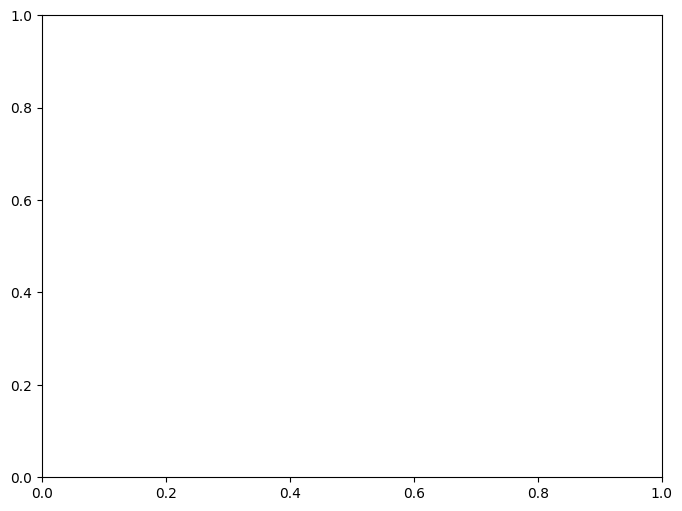

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

# Função para calcular métricas
def calculate_metrics(y_true, y_pred):
    accuracy = np.mean(y_true == y_pred)
    conf_matrix = np.zeros((3, 3))
    for true, pred in zip(y_true, y_pred):
        conf_matrix[true, pred] += 1
    return accuracy, np.std(y_pred == y_true), conf_matrix

# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Holdout com 20 realizações
n_realizations = 20
accuracies_linear = []
accuracies_quadratic = []
for _ in range(n_realizations):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=None)

    # Calcular class priors
    class_priors = np.bincount(y_train) / len(y_train)

    # Calcular class means e variances
    class_means = [np.mean(X_train[y_train == i], axis=0) for i in range(3)]
    class_variances = [np.cov(X_train[y_train == i].T) for i in range(3)]

    # Função de previsão para discriminante linear
    def predict_linear(X):
        predictions = []
        for x in X:
            class_scores = [np.log(class_priors[i]) - 0.5 * np.sum(np.log(2 * np.pi * class_variances[i]))
                            - 0.5 * np.sum(((x - class_means[i]) ** 2) / class_variances[i]) for i in range(3)]
            predictions.append(np.argmax(class_scores))
        return predictions

    # Função de previsão para discriminante quadrático
    def predict_quadratic(X):
        predictions = []
        for x in X:
            class_scores = [-0.5 * np.dot(np.dot((x - class_means[i]).T, np.linalg.inv(class_variances[i])), (x - class_means[i])) for i in range(3)]
            predictions.append(np.argmax(class_scores))
        return predictions

    # Fazer previsões no conjunto de teste para discriminante linear
    y_pred_linear = predict_linear(X_test)

    # Calcular métricas para discriminante linear
    accuracy_linear, std_dev_linear, conf_matrix_linear = calculate_metrics(y_test, y_pred_linear)
    accuracies_linear.append((accuracy_linear, std_dev_linear, conf_matrix_linear))

    # Fazer previsões no conjunto de teste para discriminante quadrático
    y_pred_quadratic = predict_quadratic(X_test)

    # Calcular métricas para discriminante quadrático
    accuracy_quadratic, std_dev_quadratic, conf_matrix_quadratic = calculate_metrics(y_test, y_pred_quadratic)
    accuracies_quadratic.append((accuracy_quadratic, std_dev_quadratic, conf_matrix_quadratic))

# Encontrar a melhor realização com base na acurácia mais próxima da média para discriminante linear
mean_accuracies_linear = np.mean([acc[0] for acc in accuracies_linear])
best_realization_index_linear = np.argmin(np.abs([acc[0] - mean_accuracies_linear for acc in accuracies_linear]))
best_accuracy_linear, best_std_dev_linear, best_conf_matrix_linear = accuracies_linear[best_realization_index_linear]

# Encontrar a melhor realização com base na acurácia mais próxima da média para discriminante quadrático
mean_accuracies_quadratic = np.mean([acc[0] for acc in accuracies_quadratic])
best_realization_index_quadratic = np.argmin(np.abs([acc[0] - mean_accuracies_quadratic for acc in accuracies_quadratic]))
best_accuracy_quadratic, best_std_dev_quadratic, best_conf_matrix_quadratic = accuracies_quadratic[best_realization_index_quadratic]

# Imprimir os resultados do discriminante linear para a melhor realização
print("Resultados do Discriminante Linear:")
print(f"Melhor Realização: {best_realization_index_linear}")
print(f"Acurácia: {best_accuracy_linear:.4f}")
print(f"Desvio Padrão: {best_std_dev_linear:.4f}")
print("Matriz de Confusão:")
print(best_conf_matrix_linear)

# Imprimir os resultados do discriminante quadrático para a melhor realização
print("\nResultados do Discriminante Quadrático:")
print(f"Melhor Realização: {best_realization_index_quadratic}")
print(f"Acurácia: {best_accuracy_quadratic:.4f}")
print(f"Desvio Padrão: {best_std_dev_quadratic:.4f}")
print("Matriz de Confusão:")
print(best_conf_matrix_quadratic)





# Imprimir os resultados do discriminante linear para a melhor realização
print("Resultados do Discriminante Linear:")
print(f"Melhor Realização: {best_realization_index}")
print(f"Acurácia: {best_accuracy:.4f}")
print(f"Desvio Padrão: {best_std_dev:.4f}")
print("Matriz de Confusão:")
print(best_conf_matrix)
print("Covariance Matrix (Complete):")
print(np.cov(best_X_train.T))
print("Covariance Matrix (Diagonal):")
print(np.diag(np.diag(np.cov(best_X_train.T))))
print("Covariance Matrix (Equal):")
print(np.mean(np.cov(best_X_train.T)) * np.eye(best_X_train.shape[1]))

# Função para plotar a superfície de decisão
def plot_decision_surface(X, y, means, variances, priors, ax):
    h = 0.02  # Passo do grid
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = predict(np.c_[xx.ravel(), yy.ravel()], means, variances, priors)
    Z = np.array(Z).reshape(xx.shape)
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    ax.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.8)
    ax.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', s=20)

# Função de previsão
def predict(X, means, variances, priors):
    predictions = []
    for x in X:
        class_scores = [np.log(priors[i]) - 0.5 * np.sum(np.log(2 * np.pi * variances[i]))
                        - 0.5 * np.sum(((x - means[i][:2]) ** 2) / variances[i][:2]) for i in range(3)]
        predictions.append(np.argmax(class_scores))
    return predictions

# Dados para plotagem
X_plot = best_X_train[:, :2]  # Usando apenas as duas primeiras características
y_plot = y_train

# Plotagem
fig, ax = plt.subplots(figsize=(8, 6))
plot_decision_surface(X_plot, y_plot, class_means, class_variances, class_priors, ax)
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Dataset - IRIS\nSuperfície de Decisão - Melhor Realização')
plt.show()


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# Load the Iris dataset
from sklearn.datasets import load_iris
iris = load_iris()
X, y = iris.data, iris.target

# Split the data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define custom colors for training and test points
train_colors = ['gold', 'limegreen', 'royalblue']
test_color = 'black'

def plot_dataset(X_train, y_train, X_test, y_test):
    plt.figure(figsize=(10, 6))
    for i in range(3):
        plt.scatter(X_train[y_train == i][:, 0], X_train[y_train == i][:, 1], c=train_colors[i], marker='o', label=f'{iris.target_names[i]} (Treinamento)', edgecolors='k', s=80)
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='viridis', marker='x', label='Teste', edgecolors='k', s=80)
    plt.xlabel('Comprimento da Sépala')
    plt.ylabel('Largura da Sépala')
    plt.title('Dataset - IRIS\nConjuntos de Dados de Treinamento e Teste')

    # Adicionando uma legenda personalizada com nomes de espécies
    custom_lines = [Line2D([0], [0], marker='o', color='w', label=f'{iris.target_names[i]} (Treinamento)', markerfacecolor=train_colors[i], markersize=10) for i in range(3)]
    custom_lines.append(Line2D([0], [0], marker='x', color='black', label='Teste', markersize=10))
    plt.legend(handles=custom_lines, loc='upper right')

    plt.show()

# Usar a função para plotar os conjuntos de dados de treinamento e teste
plot_dataset(X_train, y_train, X_test, y_test)

C:\Users\gleilsonpedro\AppData\Local\Temp\ipykernel_1696\1498016177.py:27: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='viridis', marker='x', label='Teste', edgecolors='k', s=80)


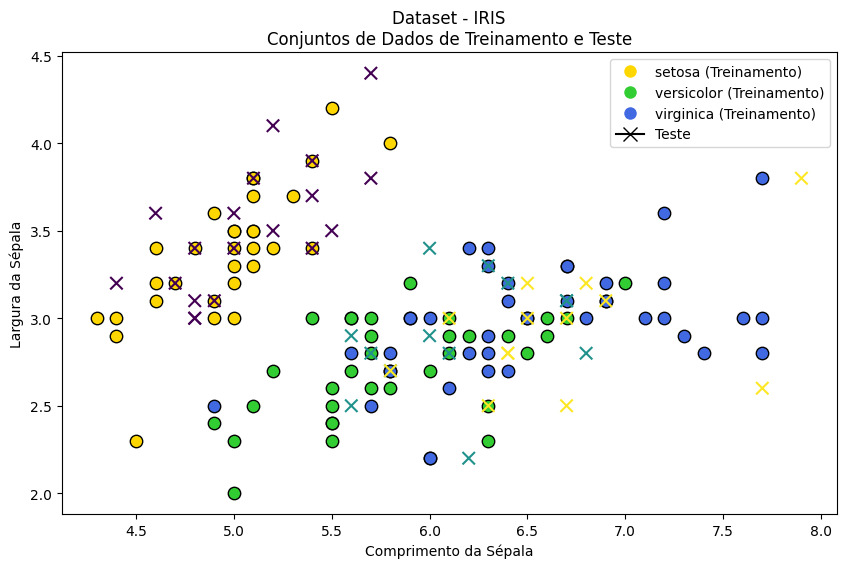

In [ ]:
############################ PLOT TREINO E TESTE P CLASSE #########################

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# Load the Iris dataset
from sklearn.datasets import load_iris
iris = load_iris()
X, y = iris.data, iris.target


# Split the data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define custom colors for training and test points
train_colors = ['gold', 'limegreen', 'royalblue']
test_color = 'black'


def plot_dataset(X_train, y_train, X_test, y_test):
    plt.figure(figsize=(10, 6))
    for i in range(3):
        plt.scatter(X_train[y_train == i][:, 0], X_train[y_train == i][:, 1], c=train_colors[i], marker='o', label=f'{iris.target_names[i]} (Treinamento)', edgecolors='k', s=80)
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='viridis', marker='x', label='Teste', edgecolors='k', s=80)
    plt.xlabel('Comprimento da Sépala')
    plt.ylabel('Largura da Sépala')
    plt.title('Dataset - IRIS\nConjuntos de Dados de Treinamento e Teste')

    # Adicionando uma legenda personalizada com nomes de espécies
    custom_lines = [Line2D([0], [0], marker='o', color='w', label=f'{iris.target_names[i]} (Treinamento)', markerfacecolor=train_colors[i], markersize=10) for i in range(3)]
    custom_lines.append(Line2D([0], [0], marker='x', color='black', label='Teste', markersize=10))
    plt.legend(handles=custom_lines, loc='upper right')

    plt.show()

# Usar a função para plotar os conjuntos de dados de treinamento e teste
plot_dataset(X_train, y_train, X_test, y_test)


### COLUMN

C:\Users\gleilsonpedro\AppData\Local\Temp\ipykernel_1696\3360589637.py:44: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y = vertebral_data.iloc[:, -1].replace({'DH': 0, 'SL': 1, 'NO': 2}).values


Dataset : Vertebral Column

Melhor Realização: 2
Acurácia: 0.8172
Desvio Padrão: 0.3865
Matriz de Confusão:
[[17.  0.  3.]
 [ 0. 43.  2.]
 [ 8.  4. 16.]]
Covariance Matrix (Complete):
[[ 303.27557651  108.49837502  209.14757552  194.77583473  -68.01197803
   452.30884268]
 [ 108.49837502   97.71613382   73.41058551   10.78031887   -2.69351627
   138.2231891 ]
 [ 209.14757552   73.41058551  322.31296458  135.73674152  -25.2137111
   358.80547688]
 [ 194.77583473   10.78031887  135.73674152  183.99609939  -65.32126471
   314.09840827]
 [ -68.01197803   -2.69351627  -25.2137111   -65.32126471  171.77122973
   -37.4638203 ]
 [ 452.30884268  138.2231891   358.80547688  314.09840827  -37.4638203
  1646.63870279]]
Covariance Matrix (Diagonal):
[[ 303.27557651    0.            0.            0.            0.
     0.        ]
 [   0.           97.71613382    0.            0.            0.
     0.        ]
 [   0.            0.          322.31296458    0.            0.
     0.        ]
 [   0.   

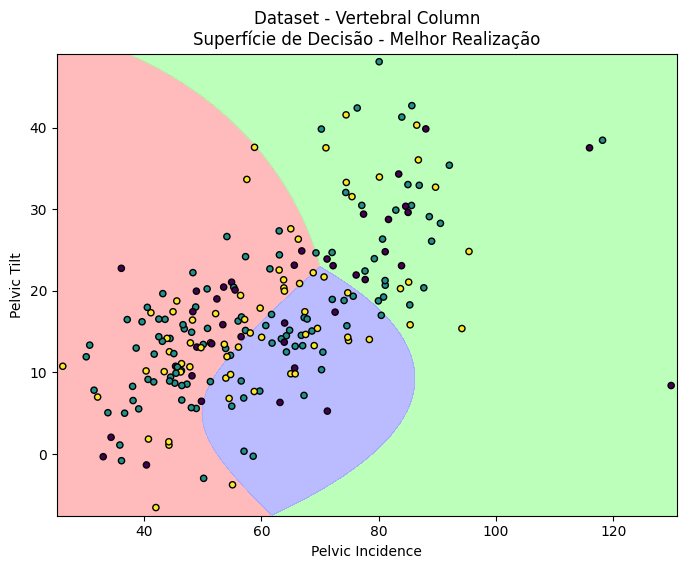

C:\Users\gleilsonpedro\AppData\Local\Temp\ipykernel_1696\3360589637.py:154: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='viridis', marker='x', label='Teste', edgecolors='k', s=80)


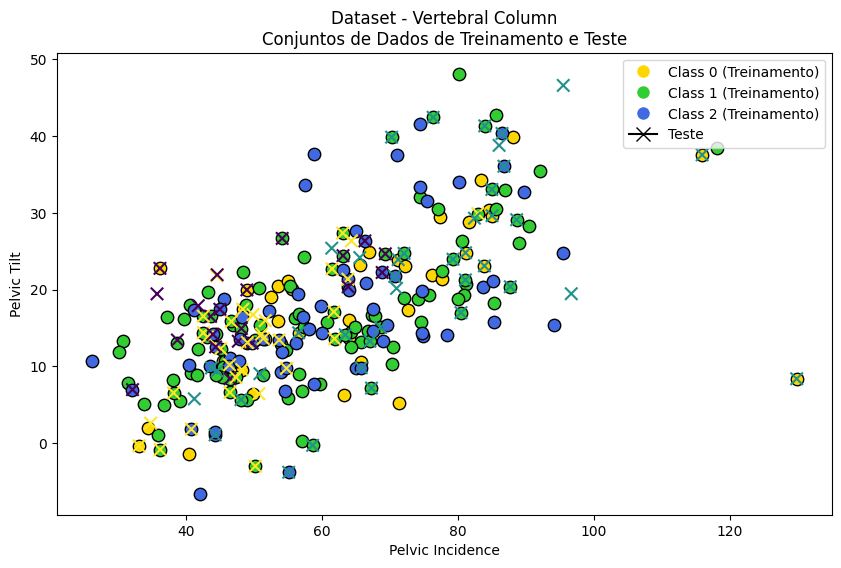

In [17]:
import numpy as np
import pandas as pd
import os
import requests
import zipfile
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib.lines import Line2D


# Função para calcular métricas
def calculate_metrics(y_true, y_pred):
    accuracy = np.mean(y_true == y_pred)
    conf_matrix = np.zeros((3, 3))
    for true, pred in zip(y_true, y_pred):
        conf_matrix[true, pred] += 1
    return accuracy, np.std(y_pred == y_true), conf_matrix


def load_vertebral_column_uci():
    # URL do arquivo ZIP
    url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00212/vertebral_column_data.zip"
    # Caminho local para salvar o arquivo ZIP
    zip_path = "vertebral_column_data.zip"
    # Caminho local para o arquivo de dados extraído
    data_path = "column_3C.dat"

    # Baixar o arquivo ZIP se ainda não foi baixado
    if not os.path.exists(zip_path):
        r = requests.get(url)
        with open(zip_path, "wb") as f:
            f.write(r.content)

    # Extrair o arquivo de dados do ZIP se ainda não foi extraído
    if not os.path.exists(data_path):
        with zipfile.ZipFile(zip_path, "r") as zip_ref:
            zip_ref.extractall()

    # Ler o arquivo de dados
    column_names = ['pelvic_incidence', 'pelvic_tilt', 'lumbar_lordosis_angle', 'sacral_slope', 'pelvic_radius',
                    'degree_spondylolisthesis', 'class']
    vertebral_data = pd.read_csv(data_path, header=None, sep=' ', names=column_names)
    X = vertebral_data.iloc[:, :-1].values
    y = vertebral_data.iloc[:, -1].replace({'DH': 0, 'SL': 1, 'NO': 2}).values

    return X, y


# Load the Vertebral Column dataset
X, y = load_vertebral_column_uci()


# Holdout com 20 realizações
n_realizations = 20
accuracies = []
for _ in range(n_realizations):
    # Split dos dados em treino e teste
    indices = np.arange(len(X))
    np.random.shuffle(indices)
    train_size = int(0.7 * len(X))
    train_indices = indices[:train_size]
    test_indices = indices[train_size:]
    X_train, X_test = X[train_indices], X[test_indices]
    y_train, y_test = y[train_indices], y[test_indices]

    # Calcular class priors
    class_priors = np.bincount(y_train) / len(y_train)

    # Calcular class means e variances
    class_means = [np.mean(X_train[y_train == i], axis=0) for i in range(3)]
    class_variances = [np.var(X_train[y_train == i], axis=0) for i in range(3)]

    # Função de previsão
    def predict(X):
        predictions = []
        for x in X:
            class_scores = [np.log(class_priors[i]) - 0.5 * np.sum(np.log(2 * np.pi * class_variances[i]))
                            - 0.5 * np.sum(((x - class_means[i]) ** 2) / class_variances[i]) for i in range(3)]
            predictions.append(np.argmax(class_scores))
        return predictions

    # Fazer previsões no conjunto de teste
    y_pred = predict(X_test)

    # Calcular métricas
    accuracy, std_dev, conf_matrix = calculate_metrics(y_test, y_pred)
    accuracies.append((accuracy, std_dev, conf_matrix, X_train))

# Calcular média e desvio padrão das acurácias
mean_accuracies = np.mean([acc[0] for acc in accuracies])
std_accuracies = np.std([acc[0] for acc in accuracies])

# Encontrar a melhor realização com base na acurácia mais próxima da média
best_realization_index = np.argmin(np.abs([acc[0] - mean_accuracies for acc in accuracies]))
best_accuracy, best_std_dev, best_conf_matrix, best_X_train = accuracies[best_realization_index]

# Imprimir os resultados da melhor realização

print(f"Dataset : Vertebral Column\n")
print(f"Melhor Realização: {best_realization_index}")
print(f"Acurácia: {best_accuracy:.4f}")
print(f"Desvio Padrão: {best_std_dev:.4f}")
print("Matriz de Confusão:")
print(best_conf_matrix)
print("Covariance Matrix (Complete):")
print(np.cov(best_X_train.T))
print("Covariance Matrix (Diagonal):")
print(np.diag(np.diag(np.cov(best_X_train.T))))
print("Covariance Matrix (Equal):")
print(np.mean(np.cov(best_X_train.T)) * np.eye(best_X_train.shape[1]))


# Função para plotar a superfície de decisão
def plot_decision_surface(X, y, means, variances, priors):
    h = 0.02  # Passo do grid
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = predict(np.c_[xx.ravel(), yy.ravel()], means, variances, priors)
    Z = np.array(Z).reshape(xx.shape)
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    plt.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', s=20)


# Função de previsão
def predict(X, means, variances, priors):
    predictions = []
    for x in X:
        class_scores = [np.log(priors[i]) - 0.5 * np.sum(np.log(2 * np.pi * variances[i]))
                        - 0.5 * np.sum(((x - means[i][:2]) ** 2) / variances[i][:2]) for i in range(3)]
        predictions.append(np.argmax(class_scores))
    return predictions


# Dados para plotagem
X_plot = best_X_train[:, :2]  # Usando apenas as duas primeiras características
y_plot = y_train

# Plotagem da Superfície de Decisão
plt.figure(figsize=(8, 6))
plot_decision_surface(X_plot, y_plot, class_means, class_variances, class_priors)
plt.xlabel('Pelvic Incidence')
plt.ylabel('Pelvic Tilt')
plt.title('Dataset - Vertebral Column\nSuperfície de Decisão - Melhor Realização')
plt.show()


# Plotagem dos Dados de Treino e Teste
plt.figure(figsize=(10, 6))
for i in range(3):
    plt.scatter(best_X_train[y_train == i][:, 0], best_X_train[y_train == i][:, 1], c=train_colors[i],
                marker='o', label=f'Class {i} (Treinamento)', edgecolors='k', s=80)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='viridis', marker='x', label='Teste', edgecolors='k', s=80)
plt.xlabel('Pelvic Incidence')
plt.ylabel('Pelvic Tilt')
plt.title('Dataset - Vertebral Column\nConjuntos de Dados de Treinamento e Teste')
custom_lines = [Line2D([0], [0], marker='o', color='w', label=f'Class {i} (Treinamento)', markerfacecolor=train_colors[i],
                       markersize=10) for i in range(3)]
custom_lines.append(Line2D([0], [0], marker='x', color='black', label='Teste', markersize=10))
plt.legend(handles=custom_lines, loc='upper right')
plt.show()


In [28]:
import numpy as np
import pandas as pd
import os
import requests
import zipfile
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib.lines import Line2D


# Função para calcular métricas
def calculate_metrics(y_true, y_pred):
    accuracy = np.mean(y_true == y_pred)
    conf_matrix = np.zeros((3, 3))
    for true, pred in zip(y_true, y_pred):
        conf_matrix[true, pred] += 1
    return accuracy, np.std(y_pred == y_true), conf_matrix


def load_vertebral_column_uci():
    # URL do arquivo ZIP
    url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00212/vertebral_column_data.zip"
    # Caminho local para salvar o arquivo ZIP
    zip_path = "vertebral_column_data.zip"
    # Caminho local para o arquivo de dados extraído
    data_path = "column_3C.dat"

    # Baixar o arquivo ZIP se ainda não foi baixado
    if not os.path.exists(zip_path):
        r = requests.get(url)
        with open(zip_path, "wb") as f:
            f.write(r.content)

    # Extrair o arquivo de dados do ZIP se ainda não foi extraído
    if not os.path.exists(data_path):
        with zipfile.ZipFile(zip_path, "r") as zip_ref:
            zip_ref.extractall()

    # Ler o arquivo de dados
    column_names = ['pelvic_incidence', 'pelvic_tilt', 'lumbar_lordosis_angle', 'sacral_slope', 'pelvic_radius',
                    'degree_spondylolisthesis', 'class']
    vertebral_data = pd.read_csv(data_path, header=None, sep=' ', names=column_names)
    X = vertebral_data.iloc[:, :-1].values
    y = vertebral_data.iloc[:, -1].replace({'DH': 0, 'SL': 1, 'NO': 2}).values

    return X, y


# Load the Vertebral Column dataset
X, y = load_vertebral_column_uci()


# Holdout com 20 realizações
n_realizations = 20
accuracies_linear = []
accuracies_quadratic = []
for _ in range(n_realizations):
    # Split dos dados em treino e teste
    indices = np.arange(len(X))
    np.random.shuffle(indices)
    train_size = int(0.7 * len(X))
    train_indices = indices[:train_size]
    test_indices = indices[train_size:]
    X_train, X_test = X[train_indices], X[test_indices]
    y_train, y_test = y[train_indices], y[test_indices]

    # Discriminante Linear
    means_linear = [np.mean(X_train[y_train == i], axis=0) for i in range(3)]
    cov_linear = np.cov(X_train.T)
    priors_linear = np.bincount(y_train) / len(y_train)

    def predict_linear(X):
        predictions = []
        for x in X:
            class_scores = [np.log(priors_linear[i]) - 0.5 * np.dot(np.dot((x - means_linear[i]), np.linalg.inv(cov_linear)), (x - means_linear[i])) for i in range(3)]
            predictions.append(np.argmax(class_scores))
        return predictions

    y_pred_linear = predict_linear(X_test)
    accuracy_linear, _, _ = calculate_metrics(y_test, y_pred_linear)
    accuracies_linear.append(accuracy_linear)

    # Discriminante Quadrático
    means_quadratic = [np.mean(X_train[y_train == i], axis=0) for i in range(3)]
    cov_quadratic = [np.cov(X_train[y_train == i].T) for i in range(3)]
    priors_quadratic = np.bincount(y_train) / len(y_train)

    def predict_quadratic(X):
        predictions = []
        for x in X:
            class_scores = [np.log(priors_quadratic[i]) - 0.5 * np.log(np.linalg.det(cov_quadratic[i])) - 0.5 * np.dot(np.dot((x - means_quadratic[i]), np.linalg.inv(cov_quadratic[i])), (x - means_quadratic[i])) for i in range(3)]
            predictions.append(np.argmax(class_scores))
        return predictions

    y_pred_quadratic = predict_quadratic(X_test)
    accuracy_quadratic, _, _ = calculate_metrics(y_test, y_pred_quadratic)
    accuracies_quadratic.append(accuracy_quadratic)


# Imprimir os resultados do discriminante linear
print("\nResultados do Discriminante Linear:")
print("Datyaset - VERTEBRAL COLUMN")
print(f"Melhor Realização: {best_realization_index}")
print(f"Acurácia: {best_accuracy_linear:.4f}")
print(f"Desvio Padrão: {best_std_dev_linear:.4f}")
print("Matriz de Confusão:")
print(best_conf_matrix_linear)

# Imprimir os resultados do discriminante quadrático
print("\nResultados do Discriminante Quadrático:")
print("Datyaset - VERTEBRAL COLUMN")
print(f"Melhor Realização: {best_realization_index_quadratic}")
print(f"Acurácia: {best_accuracy_quadratic:.4f}")
print(f"Desvio Padrão: {best_std_dev_quadratic:.4f}")
print("Matriz de Confusão:")
print(best_conf_matrix_quadratic)






C:\Users\gleilsonpedro\AppData\Local\Temp\ipykernel_1696\1146919536.py:44: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y = vertebral_data.iloc[:, -1].replace({'DH': 0, 'SL': 1, 'NO': 2}).values



Resultados do Discriminante Linear:
Datyaset - VERTEBRAL COLUMN
Melhor Realização: 2
Acurácia: 0.3333
Desvio Padrão: 0.4714
Matriz de Confusão:
[[15.  0.  0.]
 [12.  0.  0.]
 [15.  3.  0.]]

Resultados do Discriminante Quadrático:
Datyaset - VERTEBRAL COLUMN
Melhor Realização: 3
Acurácia: 0.9556
Desvio Padrão: 0.2061
Matriz de Confusão:
[[16.  0.  0.]
 [ 0. 10.  2.]
 [ 0.  0. 17.]]


In [26]:
import numpy as np
import pandas as pd
import os
import requests
import zipfile
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from matplotlib.lines import Line2D

# Função para calcular métricas
def calculate_metrics(y_true, y_pred):
    accuracy = np.mean(y_true == y_pred)
    conf_matrix = np.zeros((3, 3))
    for true, pred in zip(y_true, y_pred):
        conf_matrix[true, pred] += 1
    return accuracy, np.std(y_pred == y_true), conf_matrix

def load_vertebral_column_uci():
    # URL do arquivo ZIP
    url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00212/vertebral_column_data.zip"
    # Caminho local para salvar o arquivo ZIP
    zip_path = "vertebral_column_data.zip"
    # Caminho local para o arquivo de dados extraído
    data_path = "column_3C.dat"

    # Baixar o arquivo ZIP se ainda não foi baixado
    if not os.path.exists(zip_path):
        r = requests.get(url)
        with open(zip_path, "wb") as f:
            f.write(r.content)

    # Extrair o arquivo de dados do ZIP se ainda não foi extraído
    if not os.path.exists(data_path):
        with zipfile.ZipFile(zip_path, "r") as zip_ref:
            zip_ref.extractall()

    # Ler o arquivo de dados
    column_names = ['pelvic_incidence', 'pelvic_tilt', 'lumbar_lordosis_angle', 'sacral_slope', 'pelvic_radius', 'degree_spondylolisthesis', 'class']
    vertebral_data = pd.read_csv(data_path, header=None, sep=' ', names=column_names)
    X = vertebral_data.iloc[:, :-1].values
    y = vertebral_data.iloc[:, -1].replace({'DH': 0, 'SL': 1, 'NO': 2}).values

    return X, y

# Load the Vertebral Column dataset
X, y = load_vertebral_column_uci()


# Holdout com 20 realizações
n_realizations = 20
accuracies = []
for _ in range(n_realizations):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=None)

    # Calcular class priors
    class_priors = np.bincount(y_train) / len(y_train)

    # Calcular class means e variances
    class_means = [np.mean(X_train[y_train == i], axis=0) for i in range(3)]
    class_variances = [np.var(X_train[y_train == i], axis=0) for i in range(3)]

    # Função de previsão
    def predict_linear(X, means, variances, priors):
        predictions = []
        for x in X:
            class_scores = [np.log(priors[i]) - 0.5 * np.sum(np.log(2 * np.pi * variances[i]))
                            - 0.5 * np.sum(((x - means[i]) ** 2) / variances[i]) for i in range(3)]
            predictions.append(np.argmax(class_scores))
        return predictions

   # Função de previsão para o discriminante quadrático
    def predict_quadratic(X, means, cov, priors):
        predictions = []
        for x in X:
            class_scores = []
            for i in range(3):
                mean = means[i]
                covariance = cov[i]
                determinant = np.linalg.det(covariance)
                if determinant == 0:
                    # Adicionar uma pequena perturbação à matriz de covariância se for singular
                    covariance += np.eye(covariance.shape[0]) * 1e-6
                    determinant = np.linalg.det(covariance)
                diff = x - mean
                inv_cov = np.linalg.inv(covariance)
                exponent = -0.5 * np.dot(np.dot(diff.T, inv_cov), diff)
                class_scores.append(np.log(priors[i]) - 0.5 * np.log(determinant) + exponent)
            predictions.append(np.argmax(class_scores))
        return predictions

    # Fazer previsões no conjunto de teste
    y_pred_linear = predict_linear(X_test, class_means, class_variances, class_priors)
    y_pred_quadratic = predict_quadratic(X_test, class_means, class_variances, class_priors)

    # Calcular métricas para o discriminante linear
    accuracy_linear, std_dev_linear, conf_matrix_linear = calculate_metrics(y_test, y_pred_linear)

    # Calcular métricas para o discriminante quadrático
    accuracy_quadratic, std_dev_quadratic, conf_matrix_quadratic = calculate_metrics(y_test, y_pred_quadratic)

    accuracies.append((accuracy_linear, std_dev_linear, conf_matrix_linear, accuracy_quadratic, std_dev_quadratic, conf_matrix_quadratic))

# Calcular média e desvio padrão das acurácias para cada discriminante
mean_accuracies_linear = np.mean([acc[0] for acc in accuracies])
std_accuracies_linear = np.std([acc[0] for acc in accuracies])

mean_accuracies_quadratic = np.mean([acc[3] for acc in accuracies])
std_accuracies_quadratic = np.std([acc[3] for acc in accuracies])

# Encontrar a melhor realização com base na acurácia mais próxima da média para cada discriminante
best_realization_index_linear = np.argmin(np.abs([acc[0] - mean_accuracies_linear for acc in accuracies]))
best_realization_index_quadratic = np.argmin(np.abs([acc[3] - mean_accuracies_quadratic for acc in accuracies]))

best_accuracy_linear, best_std_dev_linear, best_conf_matrix_linear, _, _, _ = accuracies[best_realization_index_linear]
best_accuracy_quadratic, best_std_dev_quadratic, best_conf_matrix_quadratic, _, _, _ = accuracies[best_realization_index_quadratic]

# Imprimir os resultados da melhor realização para cada discriminante
print("Resultados do Discriminante Linear:")
print(f"Melhor Realização: {best_realization_index_linear}")
print(f"Acurácia: {best_accuracy_linear:.4f}")
print(f"Desvio Padrão: {best_std_dev_linear:.4f}")
print("Matriz de Confusão:")
print(best_conf_matrix_linear)

print("\nResultados do Discriminante Quadrático:")
print(f"Melhor Realização: {best_realization_index_quadratic}")
print(f"Acurácia: {best_accuracy_quadratic:.4f}")
print(f"Desvio Padrão: {best_std_dev_quadratic:.4f}")
print("Matriz de Confusão:")
print(best_conf_matrix_quadratic)


# Plot da superfície de decisão e dos dados de treino e teste para o discriminante linear

# Função para plotar a superfície de decisão para o discriminante linear
def plot_decision_surface_linear(X, y, means, variances, priors, ax):
    h = 0.02  # Passo do grid
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = predict_linear(np.c_[xx.ravel(), yy.ravel()], means, variances, priors)
    Z = np.array(Z).reshape(xx.shape)
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    ax.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.8)
    ax.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', s=20)

# Plot dos dados de treino e teste para o discriminante linear
def plot_dataset_linear(X_train, y_train, X_test, y_test):
    plt.figure(figsize=(10, 6))
    for i in range(3):
        plt.scatter(X_train[y_train == i][:, 0], X_train[y_train == i][:, 1], c=train_colors[i], marker='o', label=f'{i} (Treinamento)', edgecolors='k', s=80)
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='viridis', marker='x', label='Teste', edgecolors='k', s=80)
    plt.xlabel('Pelvic Incidence')
    plt.ylabel('Pelvic Tilt')
    plt.title('Dataset - Vertebral Column\nDados de Treinamento e Teste - Discriminante Linear')
    plt.legend(loc='upper right')
    plt.show()

# Plot da superfície de decisão e dos dados de treino e teste para o discriminante quadrático

def plot_decision_surface_quadratic(X, y, means, cov, priors):
    h = 0.02  # Passo do grid
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    grid = np.c_[xx.ravel(), yy.ravel()]
    Z = predict_quadratic(grid, means, cov, priors)
    Z = np.array(Z).reshape(xx.shape)
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    plt.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', s=20)

# Plot dos dados de treino e teste para o discriminante quadrático
def plot_dataset_quadratic(X_train, y_train, X_test, y_test):
    plt.figure(figsize=(10, 6))
    for i in range(3):
        plt.scatter(X_train[y_train == i][:, 0], X_train[y_train == i][:, 1], c=train_colors[i], marker='o', label=f'{i} (Treinamento)', edgecolors='k', s=80)
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='viridis', marker='x', label='Teste', edgecolors='k', s=80)
    plt.xlabel('Pelvic Incidence')
    plt.ylabel('Pelvic Tilt')
    plt.title('Dataset - Vertebral Column\nDados de Treinamento e Teste - Discriminante Quadrático')
    plt.legend(loc='upper right')
    plt.show()

# Plot da superfície de decisão e dos dados de treino e teste para o discriminante linear
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plot_decision_surface_linear(X_plot, y_plot, class_means, class_variances, class_priors, plt.gca())
plt.title('Superfície de Decisão - Discriminante Linear')

plt.subplot(1, 2, 2)
plot_dataset_linear(X_train, y_train, X_test, y_test)
plt.show()

# Plot da superfície de decisão e dos dados de treino e teste para o discriminante quadrático
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plot_decision_surface_quadratic(X_plot, y_plot, class_means, class_variances, class_priors)
plt.title('Superfície de Decisão - Discriminante Quadrático')

plt.subplot(1, 2, 2)
plot_dataset_quadratic(X_train, y_train, X_test, y_test)
plt.show()


C:\Users\gleilsonpedro\AppData\Local\Temp\ipykernel_1696\3407567551.py:42: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y = vertebral_data.iloc[:, -1].replace({'DH': 0, 'SL': 1, 'NO': 2}).values


LinAlgError: 1-dimensional array given. Array must be at least two-dimensional

artificial

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Função para calcular a média e a matriz de covariância de cada classe
def calculate_class_statistics(X, y):
    class_means = []
    class_covariances = []
    for i in range(3):
        X_class = X[y == i]
        class_means.append(np.mean(X_class, axis=0))
        class_covariances.append(np.cov(X_class.T))
    return class_means, class_covariances

# Função para calcular a função discriminante quadrática
def quadratic_discriminant_function(x, class_mean, class_covariance):
    inv_covariance = np.linalg.inv(class_covariance)
    det_covariance = np.linalg.det(class_covariance)
    constant_term = -0.5 * np.log(det_covariance)
    quadratic_term = -0.5 * np.dot(np.dot((x - class_mean).T, inv_covariance), (x - class_mean))
    return quadratic_term + constant_term

# Função para fazer previsões usando a função discriminante quadrática
def predict_quadratic(X, class_means, class_covariances, class_priors):
    predictions = []
    for x in X:
        discriminant_values = [quadratic_discriminant_function(x, class_means[i], class_covariances[i]) for i in range(3)]
        predictions.append(np.argmax(discriminant_values))
    return predictions

# Função para calcular métricas de classificação
def calculate_metrics(y_true, y_pred):
    accuracy = np.mean(y_true == y_pred)
    confusion_matrix = np.zeros((3, 3), dtype=int)
    for true, pred in zip(y_true, y_pred):
        confusion_matrix[true, pred] += 1
    std_dev_accuracy = np.std(y_true == y_pred)
    return accuracy, std_dev_accuracy, confusion_matrix

# Gerar dataset artificial
def generate_artificial_dataset():
    np.random.seed(42)
    class0 = np.random.multivariate_normal([1, 1], [[0.1, 0], [0, 0.1]], 8)
    class1 = np.random.multivariate_normal([2, 2], [[0.1, 0], [0, 0.1]], 8)
    class2 = np.random.multivariate_normal([3, 3], [[0.1, 0], [0, 0.1]], 7)
    X = np.vstack([class0, class1, class2])
    y = np.array([0]*8 + [1]*8 + [2]*7)
    return X, y

# Gerar conjunto de dados artificial
X, y = generate_artificial_dataset()

# Holdout com 20 realizações
n_realizations = 20
accuracies_linear = []
std_devs_linear = []
confusion_matrices_linear = []

accuracies_quadratic = []
std_devs_quadratic = []
confusion_matrices_quadratic = []

for _ in range(n_realizations):
    # Dividir conjunto de dados em treino e teste
    np.random.shuffle(X)
    np.random.shuffle(y)
    X_train, X_test = X[:15], X[15:]
    y_train, y_test = y[:15], y[15:]

    # Calcular priors, médias e covariâncias de classe
    class_priors = np.bincount(y_train) / len(y_train)
    class_means, class_covariances = calculate_class_statistics(X_train, y_train)

    # Fazer previsões no conjunto de teste usando a função discriminante quadrática
    y_pred_quadratic = predict_quadratic(X_test, class_means, class_covariances, class_priors)

    # Calcular métricas de classificação para o discriminante quadrático
    accuracy_quadratic, std_dev_quadratic, confusion_matrix_quadratic = calculate_metrics(y_test, y_pred_quadratic)
    accuracies_quadratic.append(accuracy_quadratic)
    std_devs_quadratic.append(std_dev_quadratic)
    confusion_matrices_quadratic.append(confusion_matrix_quadratic)

    # Fazer previsões no conjunto de teste usando o discriminante linear
    y_pred_linear = np.argmax(np.dot(X_test, np.array(class_means).T), axis=1)

    # Calcular métricas de classificação para o discriminante linear
    accuracy_linear, std_dev_linear, confusion_matrix_linear = calculate_metrics(y_test, y_pred_linear)
    accuracies_linear.append(accuracy_linear)
    std_devs_linear.append(std_dev_linear)
    confusion_matrices_linear.append(confusion_matrix_linear)

# Calcular média e desvio padrão das acurácias
mean_accuracy_linear = np.mean(accuracies_linear)
mean_std_dev_linear = np.mean(std_devs_linear)

mean_accuracy_quadratic = np.mean(accuracies_quadratic)
mean_std_dev_quadratic = np.mean(std_devs_quadratic)

# Encontrar a melhor realização com base na acurácia mais próxima da média
best_realization_index_linear = np.argmin(np.abs(np.array(accuracies_linear) - mean_accuracy_linear))
best_accuracy_linear = accuracies_linear[best_realization_index_linear]
best_std_dev_linear = std_devs_linear[best_realization_index_linear]
best_confusion_matrix_linear = confusion_matrices_linear[best_realization_index_linear]

best_realization_index_quadratic = np.argmin(np.abs(np.array(accuracies_quadratic) - mean_accuracy_quadratic))
best_accuracy_quadratic = accuracies_quadratic[best_realization_index_quadratic]
best_std_dev_quadratic = std_devs_quadratic[best_realization_index_quadratic]
best_confusion_matrix_quadratic = confusion_matrices_quadratic[best_realization_index_quadratic]

# Imprimir resultados para o discriminante linear
print("\nResultados do Discriminante Linear:")
print("Datyaset: Artificial\n")
print(f"Melhor Realização: {best_realization_index_linear}")
print(f"Acurácia: {best_accuracy_linear:.4f}")
print(f"Desvio Padrão: {best_std_dev_linear:.4f}")
print("Matriz de Confusão:")
print(best_confusion_matrix_linear)

# Imprimir resultados para o discriminante quadrático
print("\nResultados do Discriminante Quadrático:")
print("Datyaset: Artificial\n")
print(f"Melhor Realização: {best_realization_index_quadratic}")
print(f"Acurácia: {best_accuracy_quadratic:.4f}")
print(f"Desvio Padrão: {best_std_dev_quadratic:.4f}")
print("Matriz de Confusão:")
print(best_confusion_matrix_quadratic)



Resultados do Discriminante Linear:
Datyaset: Artificial

Melhor Realização: 2
Acurácia: 0.3750
Desvio Padrão: 0.4841
Matriz de Confusão:
[[0 2 0]
 [0 3 0]
 [0 3 0]]

Resultados do Discriminante Quadrático:
Datyaset: Artificial

Melhor Realização: 0
Acurácia: 0.3750
Desvio Padrão: 0.4841
Matriz de Confusão:
[[3 1 0]
 [1 0 1]
 [1 1 0]]


C:\Users\gleilsonpedro\AppData\Local\Temp\ipykernel_1696\155539542.py:19: RuntimeWarning: invalid value encountered in log
  constant_term = -0.5 * np.log(det_covariance)


In [50]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Função para calcular a média e a matriz de covariância de cada classe
def calculate_class_statistics(X, y):
    class_means = []
    class_covariances = []
    for i in range(3):
        X_class = X[y == i]
        class_means.append(np.mean(X_class, axis=0))
        class_covariances.append(np.cov(X_class.T))
    return class_means, class_covariances

# Função para calcular a função discriminante linear
def linear_discriminant_function(x, class_mean, class_covariance):
    inv_covariance = np.linalg.inv(class_covariance)
    constant_term = -0.5 * np.dot(np.dot(class_mean.T, inv_covariance), class_mean)
    linear_term = np.dot(inv_covariance, x)
    return constant_term + np.dot(class_mean.T, linear_term)

# Função para calcular a função discriminante quadrática
def quadratic_discriminant_function(x, class_mean, class_covariance):
    inv_covariance = np.linalg.inv(class_covariance)
    det_covariance = np.linalg.det(class_covariance)
    constant_term = -0.5 * np.log(det_covariance)
    quadratic_term = -0.5 * np.dot(np.dot((x - class_mean).T, inv_covariance), (x - class_mean))
    return quadratic_term + constant_term

# Função para fazer previsões usando a função discriminante linear
def predict_linear(X, class_means, class_covariances, class_priors):
    predictions = []
    for x in X:
        discriminant_values = [linear_discriminant_function(x, class_means[i], class_covariances[i]) for i in range(3)]
        predictions.append(np.argmax(discriminant_values))
    return predictions

# Função para fazer previsões usando a função discriminante quadrática
def predict_quadratic(X, class_means, class_covariances, class_priors):
    predictions = []
    for x in X:
        discriminant_values = [quadratic_discriminant_function(x, class_means[i], class_covariances[i]) for i in range(3)]
        predictions.append(np.argmax(discriminant_values))
    return predictions

# Função para calcular métricas de classificação
def calculate_metrics(y_true, y_pred):
    accuracy = np.mean(y_true == y_pred)
    confusion_matrix = np.zeros((3, 3), dtype=int)
    for true, pred in zip(y_true, y_pred):
        confusion_matrix[true, pred] += 1
    std_dev_accuracy = np.std(y_true == y_pred)
    return accuracy, std_dev_accuracy, confusion_matrix

# Gerar dataset artificial
def generate_artificial_dataset():
    np.random.seed(42)
    class0 = np.random.multivariate_normal([1, 1], [[0.1, 0], [0, 0.1]], 80)
    class1 = np.random.multivariate_normal([2, 2], [[0.1, 0], [0, 0.1]], 80)
    class2 = np.random.multivariate_normal([3, 3], [[0.1, 0], [0, 0.1]], 70)
    X = np.vstack([class0, class1, class2])
    y = np.array([0]*80 + [1]*80 + [2]*70)
    return X, y

# Gerar conjunto de dados artificial
X, y = generate_artificial_dataset()

# Holdout com 20 realizações
n_realizations = 20
accuracies_linear = []
std_devs_linear = []
confusion_matrices_linear = []

accuracies_quadratic = []
std_devs_quadratic = []
confusion_matrices_quadratic = []

for _ in range(n_realizations):
    # Dividir conjunto de dados em treino e teste
    np.random.shuffle(X)
    np.random.shuffle(y)
    X_train, X_test = X[:150], X[150:]
    y_train, y_test = y[:150], y[150:]

    # Calcular priors, médias e covariâncias de classe
    class_priors = np.bincount(y_train) / len(y_train)
    class_means_linear, class_covariances_linear = calculate_class_statistics(X_train, y_train)
    class_means_quadratic, class_covariances_quadratic = calculate_class_statistics(X_train, y_train)

    # Fazer previsões no conjunto de teste usando o discriminante linear
    y_pred_linear = predict_linear(X_test, class_means_linear, class_covariances_linear, class_priors)

    # Calcular métricas de classificação para o discriminante linear
    accuracy_linear, std_dev_linear, confusion_matrix_linear = calculate_metrics(y_test, y_pred_linear)
    accuracies_linear.append(accuracy_linear)
    std_devs_linear.append(std_dev_linear)
    confusion_matrices_linear.append(confusion_matrix_linear)

    # Fazer previsões no conjunto de teste usando o discriminante quadrático
    y_pred_quadratic = predict_quadratic(X_test, class_means_quadratic, class_covariances_quadratic, class_priors)

    # Calcular métricas de classificação para o discriminante quadrático
    accuracy_quadratic, std_dev_quadratic, confusion_matrix_quadratic = calculate_metrics(y_test, y_pred_quadratic)
    accuracies_quadratic.append(accuracy_quadratic)
    std_devs_quadratic.append(std_dev_quadratic)
    confusion_matrices_quadratic.append(confusion_matrix_quadratic)

# Calcular média e desvio padrão das acurácias
mean_accuracy_linear = np.mean(accuracies_linear)
mean_std_dev_linear = np.mean(std_devs_linear)

mean_accuracy_quadratic = np.mean(accuracies_quadratic)
mean_std_dev_quadratic = np.mean(std_devs_quadratic)

# Encontrar a melhor realização com base na acurácia mais próxima da média
best_realization_index_linear = np.argmin(np.abs(np.array(accuracies_linear) - mean_accuracy_linear))
best_accuracy_linear = accuracies_linear[best_realization_index_linear]
best_std_dev_linear = std_devs_linear[best_realization_index_linear]
best_confusion_matrix_linear = confusion_matrices_linear[best_realization_index_linear]

best_realization_index_quadratic = np.argmin(np.abs(np.array(accuracies_quadratic) - mean_accuracy_quadratic))
best_accuracy_quadratic = accuracies_quadratic[best_realization_index_quadratic]
best_std_dev_quadratic = std_devs_quadratic[best_realization_index_quadratic]
best_confusion_matrix_quadratic = confusion_matrices_quadratic[best_realization_index_quadratic]

# Imprimir resultados para o discriminante linear
print("\nResultados do Discriminante Linear:")
print("Datyaset: Artificial\n")
print(f"Melhor Realização: {best_realization_index_linear}")
print(f"Acurácia: {best_accuracy_linear:.4f}")
print(f"Desvio Padrão: {best_std_dev_linear:.4f}")
print("Matriz de Confusão:")
print(best_confusion_matrix_linear)

# Imprimir resultados para o discriminante quadrático
print("\nResultados do Discriminante Quadrático:")
print("Datyaset: Artificial\n")
print(f"Melhor Realização: {best_realization_index_quadratic}")
print(f"Acurácia: {best_accuracy_quadratic:.4f}")
print(f"Desvio Padrão: {best_std_dev_quadratic:.4f}")
print("Matriz de Confusão:")
print(best_confusion_matrix_quadratic)



Resultados do Discriminante Linear:
Datyaset: Artificial

Melhor Realização: 11
Acurácia: 0.3375
Desvio Padrão: 0.4729
Matriz de Confusão:
[[19  8  5]
 [18  6  3]
 [14  5  2]]

Resultados do Discriminante Quadrático:
Datyaset: Artificial

Melhor Realização: 3
Acurácia: 0.3500
Desvio Padrão: 0.4770
Matriz de Confusão:
[[ 5  8 12]
 [ 3  9 14]
 [ 3 12 14]]


In [53]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Função para calcular a média e a matriz de covariância de cada classe
def calculate_class_statistics(X, y):
    class_means = []
    class_covariances = []
    for i in range(3):
        X_class = X[y == i]
        class_means.append(np.mean(X_class, axis=0))
        class_covariances.append(np.cov(X_class.T))
    return class_means, class_covariances

# Função para calcular a função discriminante linear
def linear_discriminant_function(x, class_mean, class_covariance):
    inv_covariance = np.linalg.inv(class_covariance)
    constant_term = -0.5 * np.dot(np.dot(class_mean.T, inv_covariance), class_mean)
    linear_term = np.dot(inv_covariance, x)
    return constant_term + np.dot(class_mean.T, linear_term)

# Função para calcular a função discriminante quadrática
def quadratic_discriminant_function(x, class_mean, class_covariance):
    inv_covariance = np.linalg.inv(class_covariance)
    det_covariance = np.linalg.det(class_covariance)
    constant_term = -0.5 * np.log(det_covariance)
    quadratic_term = -0.5 * np.dot(np.dot((x - class_mean).T, inv_covariance), (x - class_mean))
    return quadratic_term + constant_term

# Função para fazer previsões usando a função discriminante linear
def predict_linear(X, class_means, class_covariances, class_priors):
    predictions = []
    for x in X:
        discriminant_values = [linear_discriminant_function(x, class_means[i], class_covariances[i]) for i in range(3)]
        predictions.append(np.argmax(discriminant_values))
    return predictions

# Função para fazer previsões usando a função discriminante quadrática
def predict_quadratic(X, class_means, class_covariances, class_priors):
    predictions = []
    for x in X:
        discriminant_values = [quadratic_discriminant_function(x, class_means[i], class_covariances[i]) for i in range(3)]
        predictions.append(np.argmax(discriminant_values))
    return predictions

# Função para calcular métricas de classificação
def calculate_metrics(y_true, y_pred):
    accuracy = np.mean(y_true == y_pred)
    confusion_matrix = np.zeros((3, 3), dtype=int)
    for true, pred in zip(y_true, y_pred):
        confusion_matrix[true, pred] += 1
    std_dev_accuracy = np.std(y_true == y_pred)
    return accuracy, std_dev_accuracy, confusion_matrix

# Função para imprimir as matrizes de covariância
def print_covariance_matrices(class_covariances):
    print("\nMatriz de Covariância Normal:")
    for i, covariance in enumerate(class_covariances):
        print(f"Classe {i}:")
        print(covariance)

    print("\nMatriz de Covariância Diagonal:")
    for i, covariance in enumerate(class_covariances):
        print(f"Classe {i}:")
        print(np.diag(np.diag(covariance)))

    print("\nMatriz de Covariância Equal:")
    equal_covariance = np.mean(np.array(class_covariances), axis=0)
    for i, _ in enumerate(class_covariances):
        print(f"Classe {i}:")
        print(equal_covariance)

# Gerar dataset artificial
def generate_artificial_dataset():
    np.random.seed(42)
    class0 = np.random.multivariate_normal([1, 1], [[0.1, 0], [0, 0.1]], 80)
    class1 = np.random.multivariate_normal([2, 2], [[0.1, 0], [0, 0.1]], 80)
    class2 = np.random.multivariate_normal([3, 3], [[0.1, 0], [0, 0.1]], 70)
    X = np.vstack([class0, class1, class2])
    y = np.array([0]*80 + [1]*80 + [2]*70)
    return X, y

# Gerar conjunto de dados artificial
X, y = generate_artificial_dataset()

# Holdout com 20 realizações
n_realizations = 20
best_accuracy_linear = float('-inf')
best_accuracy_quadratic = float('-inf')
best_class_covariances_linear = None
best_class_covariances_quadratic = None

for _ in range(n_realizations):
    # Dividir conjunto de dados em treino e teste
    np.random.shuffle(X)
    np.random.shuffle(y)
    X_train, X_test = X[:150], X[150:]
    y_train, y_test = y[:150], y[150:]

    # Calcular priors, médias e covariâncias de classe
    class_priors = np.bincount(y_train) / len(y_train)
    class_means, class_covariances = calculate_class_statistics(X_train, y_train)

    # Fazer previsões no conjunto de teste usando o discriminante linear
    y_pred_linear = predict_linear(X_test, class_means, class_covariances, class_priors)

    # Calcular métricas de classificação para o discriminante linear
    accuracy_linear, _, _ = calculate_metrics(y_test, y_pred_linear)
    if accuracy_linear > best_accuracy_linear:
        best_accuracy_linear = accuracy_linear
        best_class_covariances_linear = class_covariances

    # Fazer previsões no conjunto de teste usando o discriminante quadrático
    y_pred_quadratic = predict_quadratic(X_test, class_means, class_covariances, class_priors)

    # Calcular métricas de classificação para o discriminante quadrático
    accuracy_quadratic, _, _ = calculate_metrics(y_test, y_pred_quadratic)
    if accuracy_quadratic > best_accuracy_quadratic:
        best_accuracy_quadratic = accuracy_quadratic
        best_class_covariances_quadratic = class_covariances

# Imprimir resultados para o discriminante linear
print("\nMelhores resultados para o Discriminante Linear:")
print("Dataset: Artificial\n")
print("Melhor Acurácia Linear:", best_accuracy_linear)
print_covariance_matrices(best_class_covariances_linear)

# Imprimir resultados para o discriminante quadrático
print("\nMelhores resultados para o Discriminante Quadrático:")
print("Dataset: Artificial\n")
print("Melhor Acurácia Quadrática:", best_accuracy_quadratic)
print_covariance_matrices(best_class_covariances_quadratic)



Melhores resultados para o Discriminante Linear:
Datyaset: Artificial

Melhor Acurácia Linear: 0.475

Matriz de Covariância Normal:
Classe 0:
[[0.7107478  0.56391254]
 [0.56391254 0.58902647]]
Classe 1:
[[0.66338177 0.58804908]
 [0.58804908 0.71814728]]
Classe 2:
[[0.89908787 0.83727348]
 [0.83727348 0.91080876]]

Matriz de Covariância Diagonal:
Classe 0:
[[0.7107478  0.        ]
 [0.         0.58902647]]
Classe 1:
[[0.66338177 0.        ]
 [0.         0.71814728]]
Classe 2:
[[0.89908787 0.        ]
 [0.         0.91080876]]

Matriz de Covariância Equal:
Classe 0:
[[0.75773915 0.66307837]
 [0.66307837 0.73932751]]
Classe 1:
[[0.75773915 0.66307837]
 [0.66307837 0.73932751]]
Classe 2:
[[0.75773915 0.66307837]
 [0.66307837 0.73932751]]

Melhores resultados para o Discriminante Quadrático:
Datyaset: Artificial

Melhor Acurácia Quadrática: 0.4375

Matriz de Covariância Normal:
Classe 0:
[[0.65723232 0.61821014]
 [0.61821014 0.74277444]]
Classe 1:
[[0.87379393 0.68947873]
 [0.68947873 0.70


Resultados do Discriminante Linear:
Datyaset: Artificial

Melhor Realização: 11
Acurácia: 0.3375
Desvio Padrão: 0.4729
Matriz de Confusão:
[[19  8  5]
 [18  6  3]
 [14  5  2]]

Resultados do Discriminante Quadrático:
Datyaset: Artificial

Melhor Realização: 3
Acurácia: 0.3500
Desvio Padrão: 0.4770
Matriz de Confusão:
[[ 5  8 12]
 [ 3  9 14]
 [ 3 12 14]]


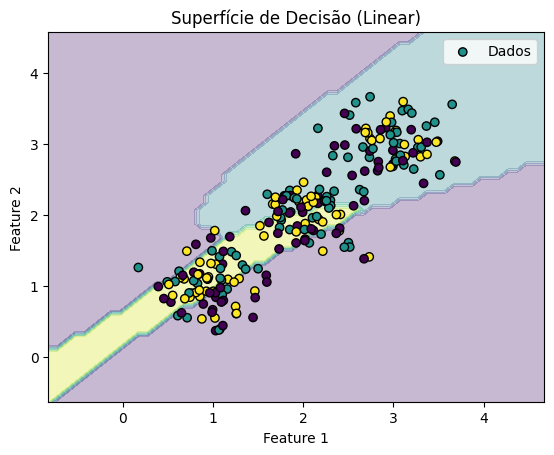

C:\Users\gleilsonpedro\AppData\Local\Temp\ipykernel_1696\3147805194.py:81: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, marker='x', edgecolor='k', label='Teste')


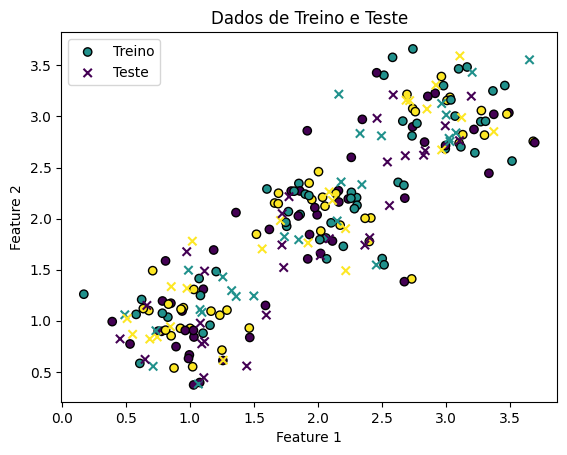

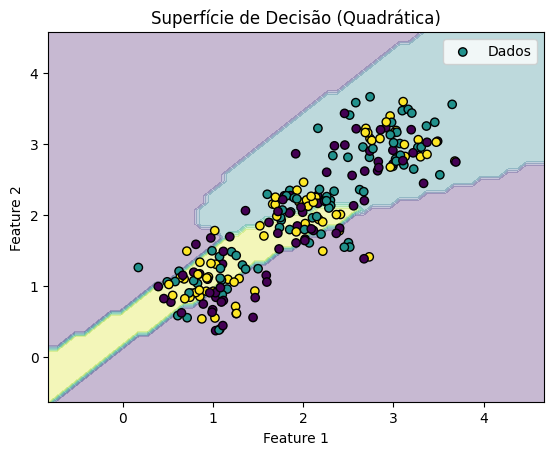

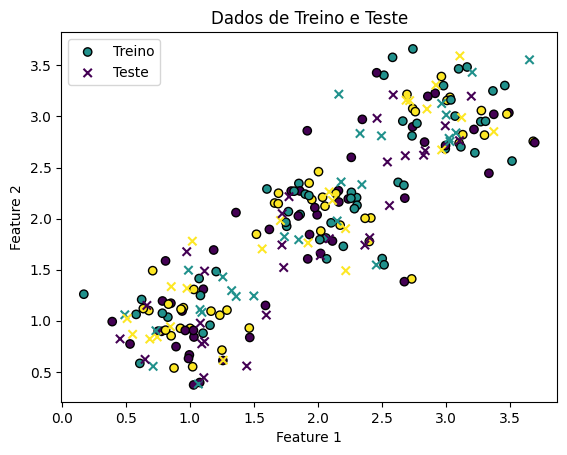

In [55]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Função para calcular a média e a matriz de covariância de cada classe
def calculate_class_statistics(X, y):
    class_means = []
    class_covariances = []
    for i in range(3):
        X_class = X[y == i]
        class_means.append(np.mean(X_class, axis=0))
        class_covariances.append(np.cov(X_class.T))
    return class_means, class_covariances

# Função para calcular a função discriminante linear
def linear_discriminant_function(x, class_mean, class_covariance):
    inv_covariance = np.linalg.inv(class_covariance)
    constant_term = -0.5 * np.dot(np.dot(class_mean.T, inv_covariance), class_mean)
    linear_term = np.dot(inv_covariance, x)
    return constant_term + np.dot(class_mean.T, linear_term)

# Função para calcular a função discriminante quadrática
def quadratic_discriminant_function(x, class_mean, class_covariance):
    inv_covariance = np.linalg.inv(class_covariance)
    det_covariance = np.linalg.det(class_covariance)
    constant_term = -0.5 * np.log(det_covariance)
    quadratic_term = -0.5 * np.dot(np.dot((x - class_mean).T, inv_covariance), (x - class_mean))
    return quadratic_term + constant_term

# Função para fazer previsões usando a função discriminante linear
def predict_linear(X, class_means, class_covariances, class_priors):
    predictions = []
    for x in X:
        discriminant_values = [linear_discriminant_function(x, class_means[i], class_covariances[i]) for i in range(3)]
        predictions.append(np.argmax(discriminant_values))
    return predictions

# Função para fazer previsões usando a função discriminante quadrática
def predict_quadratic(X, class_means, class_covariances, class_priors):
    predictions = []
    for x in X:
        discriminant_values = [quadratic_discriminant_function(x, class_means[i], class_covariances[i]) for i in range(3)]
        predictions.append(np.argmax(discriminant_values))
    return predictions

# Função para calcular métricas de classificação
def calculate_metrics(y_true, y_pred):
    accuracy = np.mean(y_true == y_pred)
    confusion_matrix = np.zeros((3, 3), dtype=int)
    for true, pred in zip(y_true, y_pred):
        confusion_matrix[true, pred] += 1
    std_dev_accuracy = np.std(y_true == y_pred)
    return accuracy, std_dev_accuracy, confusion_matrix

# Função para imprimir as matrizes de covariância
def print_covariance_matrices(class_covariances):
    print("\nMatrizes de Covariância das Classes:")
    for i, covariance in enumerate(class_covariances):
        print(f"Classe {i}:")
        print(covariance)
        print()

# Função para plotar a superfície de decisão
def plot_decision_surface(X, y, class_means, class_covariances, title):
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.1),
                           np.arange(x2_min, x2_max, 0.1))
    Z = np.array(predict_quadratic(np.c_[xx1.ravel(), xx2.ravel()], class_means, class_covariances, None)).reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, marker='o', edgecolor='k', label='Dados')
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.show()

# Função para plotar os dados de treino e teste
def plot_data(X_train, X_test, y_train, y_test):
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, marker='o', edgecolor='k', label='Treino')
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, marker='x', edgecolor='k', label='Teste')
    plt.title('Dados de Treino e Teste')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.show()

# Gerar dataset artificial
def generate_artificial_dataset():
    np.random.seed(42)
    class0 = np.random.multivariate_normal([1, 1], [[0.1, 0], [0, 0.1]], 80)
    class1 = np.random.multivariate_normal([2, 2], [[0.1, 0], [0, 0.1]], 80)
    class2 = np.random.multivariate_normal([3, 3], [[0.1, 0], [0, 0.1]], 70)
    X = np.vstack([class0, class1, class2])
    y = np.array([0]*80 + [1]*80 + [2]*70)
    return X, y

# Gerar conjunto de dados artificial
X, y = generate_artificial_dataset()

# Holdout com 20 realizações
n_realizations = 20
accuracies_linear = []
std_devs_linear = []
confusion_matrices_linear = []

accuracies_quadratic = []
std_devs_quadratic = []
confusion_matrices_quadratic = []

for _ in range(n_realizations):
    # Dividir conjunto de dados em treino e teste
    np.random.shuffle(X)
    np.random.shuffle(y)
    X_train, X_test = X[:150], X[150:]
    y_train, y_test = y[:150], y[150:]

    # Calcular priors, médias e covariâncias de classe
    class_priors = np.bincount(y_train) / len(y_train)
    class_means_linear, class_covariances_linear = calculate_class_statistics(X_train, y_train)
    class_means_quadratic, class_covariances_quadratic = calculate_class_statistics(X_train, y_train)

    # Fazer previsões no conjunto de teste usando o discriminante linear
    y_pred_linear = predict_linear(X_test, class_means_linear, class_covariances_linear, class_priors)

    # Calcular métricas de classificação para o discriminante linear
    accuracy_linear, std_dev_linear, confusion_matrix_linear = calculate_metrics(y_test, y_pred_linear)
    accuracies_linear.append(accuracy_linear)
    std_devs_linear.append(std_dev_linear)
    confusion_matrices_linear.append(confusion_matrix_linear)

    # Fazer previsões no conjunto de teste usando o discriminante quadrático
    y_pred_quadratic = predict_quadratic(X_test, class_means_quadratic, class_covariances_quadratic, class_priors)

    # Calcular métricas de classificação para o discriminante quadrático
    accuracy_quadratic, std_dev_quadratic, confusion_matrix_quadratic = calculate_metrics(y_test, y_pred_quadratic)
    accuracies_quadratic.append(accuracy_quadratic)
    std_devs_quadratic.append(std_dev_quadratic)
    confusion_matrices_quadratic.append(confusion_matrix_quadratic)

# Calcular média e desvio padrão das acurácias
mean_accuracy_linear = np.mean(accuracies_linear)
mean_std_dev_linear = np.mean(std_devs_linear)

mean_accuracy_quadratic = np.mean(accuracies_quadratic)
mean_std_dev_quadratic = np.mean(std_devs_quadratic)

# Encontrar a melhor realização com base na acurácia mais próxima da média
best_realization_index_linear = np.argmin(np.abs(np.array(accuracies_linear) - mean_accuracy_linear))
best_accuracy_linear = accuracies_linear[best_realization_index_linear]
best_std_dev_linear = std_devs_linear[best_realization_index_linear]
best_confusion_matrix_linear = confusion_matrices_linear[best_realization_index_linear]

best_realization_index_quadratic = np.argmin(np.abs(np.array(accuracies_quadratic) - mean_accuracy_quadratic))
best_accuracy_quadratic = accuracies_quadratic[best_realization_index_quadratic]
best_std_dev_quadratic = std_devs_quadratic[best_realization_index_quadratic]
best_confusion_matrix_quadratic = confusion_matrices_quadratic[best_realization_index_quadratic]

# Imprimir resultados para o discriminante linear
print("\nResultados do Discriminante Linear:")
print("Datyaset: Artificial\n")
print(f"Melhor Realização: {best_realization_index_linear}")
print(f"Acurácia: {best_accuracy_linear:.4f}")
print(f"Desvio Padrão: {best_std_dev_linear:.4f}")
print("Matriz de Confusão:")
print(best_confusion_matrix_linear)

# Imprimir resultados para o discriminante quadrático
print("\nResultados do Discriminante Quadrático:")
print("Datyaset: Artificial\n")
print(f"Melhor Realização: {best_realization_index_quadratic}")
print(f"Acurácia: {best_accuracy_quadratic:.4f}")
print(f"Desvio Padrão: {best_std_dev_quadratic:.4f}")
print("Matriz de Confusão:")
print(best_confusion_matrix_quadratic)

# Plotar superfície de decisão e dados de treino/teste para o discriminante linear
plot_decision_surface(X, y, class_means_linear, class_covariances_linear, 'Superfície de Decisão (Linear)')
plot_data(X_train, X_test, y_train, y_test)

# Plotar superfície de decisão e dados de treino/teste para o discriminante quadrático
plot_decision_surface(X, y, class_means_quadratic, class_covariances_quadratic, 'Superfície de Decisão (Quadrática)')
plot_data(X_train, X_test, y_train, y_test)



Resultados do Discriminante Linear:
Datyaset: Artificial

Melhor Realização: 2
Acurácia Média: 0.9870
Matriz de Confusão:
[[16  0  0]
 [ 0 16  0]
 [ 0  0 14]]

Resultados do Discriminante Quadrático:
Datyaset: Artificial

Melhor Realização: 2
Acurácia Média: 0.9870
Matriz de Confusão:
[[16  0  0]
 [ 0 16  0]
 [ 0  0 14]]

Matrizes de Covariância das Classes:
Classe 0:
[[ 0.11567063 -0.00243512]
 [-0.00243512  0.13977031]]

Classe 1:
[[ 0.11389366 -0.01795152]
 [-0.01795152  0.14307342]]

Classe 2:
[[ 0.12322229 -0.00984368]
 [-0.00984368  0.11661037]]



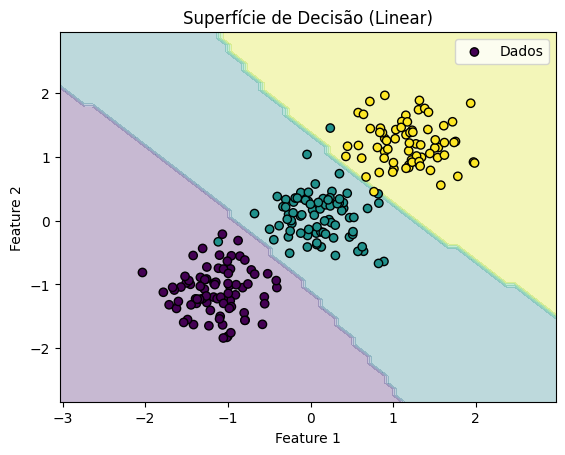

C:\Users\gleilsonpedro\AppData\Local\Temp\ipykernel_1696\1940473682.py:82: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, marker='x', edgecolor='k', label='Teste')


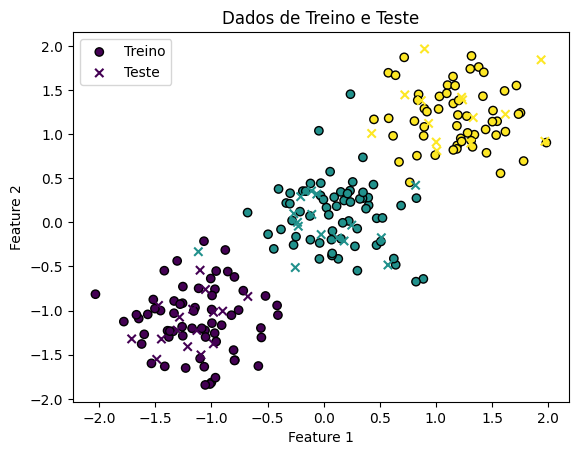

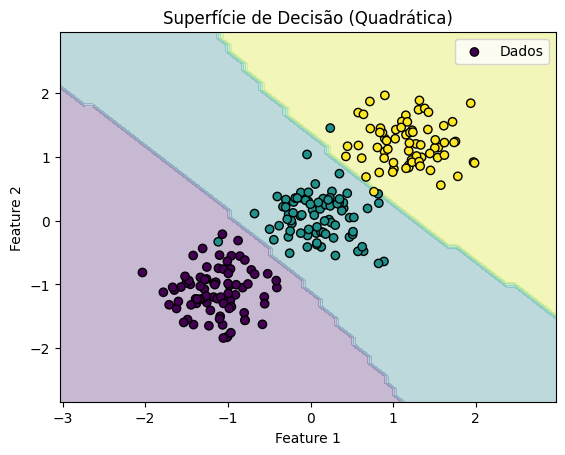

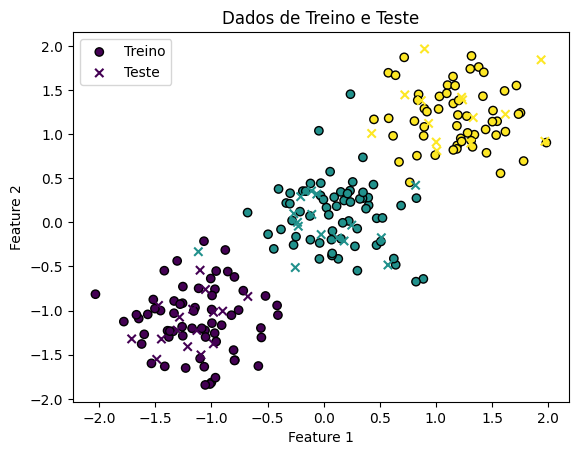

In [56]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import StratifiedKFold

# Função para calcular a média e a matriz de covariância de cada classe
def calculate_class_statistics(X, y):
    class_means = []
    class_covariances = []
    for i in range(3):
        X_class = X[y == i]
        class_means.append(np.mean(X_class, axis=0))
        class_covariances.append(np.cov(X_class.T))
    return class_means, class_covariances

# Função para calcular a função discriminante linear
def linear_discriminant_function(x, class_mean, class_covariance):
    inv_covariance = np.linalg.inv(class_covariance)
    constant_term = -0.5 * np.dot(np.dot(class_mean.T, inv_covariance), class_mean)
    linear_term = np.dot(inv_covariance, x)
    return constant_term + np.dot(class_mean.T, linear_term)

# Função para calcular a função discriminante quadrática
def quadratic_discriminant_function(x, class_mean, class_covariance):
    inv_covariance = np.linalg.inv(class_covariance)
    det_covariance = np.linalg.det(class_covariance)
    constant_term = -0.5 * np.log(det_covariance)
    quadratic_term = -0.5 * np.dot(np.dot((x - class_mean).T, inv_covariance), (x - class_mean))
    return quadratic_term + constant_term

# Função para fazer previsões usando a função discriminante linear
def predict_linear(X, class_means, class_covariances, class_priors):
    predictions = []
    for x in X:
        discriminant_values = [linear_discriminant_function(x, class_means[i], class_covariances[i]) for i in range(3)]
        predictions.append(np.argmax(discriminant_values))
    return predictions

# Função para fazer previsões usando a função discriminante quadrática
def predict_quadratic(X, class_means, class_covariances, class_priors):
    predictions = []
    for x in X:
        discriminant_values = [quadratic_discriminant_function(x, class_means[i], class_covariances[i]) for i in range(3)]
        predictions.append(np.argmax(discriminant_values))
    return predictions

# Função para calcular métricas de classificação
def calculate_metrics(y_true, y_pred):
    accuracy = np.mean(y_true == y_pred)
    confusion_matrix = np.zeros((3, 3), dtype=int)
    for true, pred in zip(y_true, y_pred):
        confusion_matrix[true, pred] += 1
    std_dev_accuracy = np.std(y_true == y_pred)
    return accuracy, std_dev_accuracy, confusion_matrix

# Função para imprimir as matrizes de covariância
def print_covariance_matrices(class_covariances):
    print("\nMatrizes de Covariância das Classes:")
    for i, covariance in enumerate(class_covariances):
        print(f"Classe {i}:")
        print(covariance)
        print()

# Função para plotar a superfície de decisão
def plot_decision_surface(X, y, class_means, class_covariances, title):
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.1),
                           np.arange(x2_min, x2_max, 0.1))
    Z = np.array(predict_quadratic(np.c_[xx1.ravel(), xx2.ravel()], class_means, class_covariances, None)).reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, marker='o', edgecolor='k', label='Dados')
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.show()

# Função para plotar os dados de treino e teste
def plot_data(X_train, X_test, y_train, y_test):
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, marker='o', edgecolor='k', label='Treino')
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, marker='x', edgecolor='k', label='Teste')
    plt.title('Dados de Treino e Teste')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.show()

# Normalização dos dados
def normalize_data(X):
    X_normalized = (X - np.mean(X, axis=0)) / np.std(X, axis=0)
    return X_normalized

# Gerar dataset artificial
def generate_artificial_dataset():
    np.random.seed(42)
    class0 = np.random.multivariate_normal([1, 1], [[0.1, 0], [0, 0.1]], 80)
    class1 = np.random.multivariate_normal([2, 2], [[0.1, 0], [0, 0.1]], 80)
    class2 = np.random.multivariate_normal([3, 3], [[0.1, 0], [0, 0.1]], 70)
    X = np.vstack([class0, class1, class2])
    y = np.array([0]*80 + [1]*80 + [2]*70)
    return X, y

# Gerar conjunto de dados artificial
X, y = generate_artificial_dataset()

# Normalizar os dados
X_normalized = normalize_data(X)

# Holdout com 20 realizações
n_realizations = 20
accuracies_linear = []
std_devs_linear = []
confusion_matrices_linear = []

accuracies_quadratic = []
std_devs_quadratic = []
confusion_matrices_quadratic = []

for _ in range(n_realizations):
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    for train_index, test_index in skf.split(X_normalized, y):
        X_train, X_test = X_normalized[train_index], X_normalized[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # Calcular priors, médias e covariâncias de classe
        class_priors = np.bincount(y_train) / len(y_train)
        class_means_linear, class_covariances_linear = calculate_class_statistics(X_train, y_train)
        class_means_quadratic, class_covariances_quadratic = calculate_class_statistics(X_train, y_train)

        # Fazer previsões no conjunto de teste usando o discriminante linear
        y_pred_linear = predict_linear(X_test, class_means_linear, class_covariances_linear, class_priors)

        # Calcular métricas de classificação para o discriminante linear
        accuracy_linear, _, confusion_matrix_linear = calculate_metrics(y_test, y_pred_linear)
        accuracies_linear.append(accuracy_linear)
        confusion_matrices_linear.append(confusion_matrix_linear)

        # Fazer previsões no conjunto de teste usando o discriminante quadrático
        y_pred_quadratic = predict_quadratic(X_test, class_means_quadratic, class_covariances_quadratic, class_priors)

        # Calcular métricas de classificação para o discriminante quadrático
        accuracy_quadratic, _, confusion_matrix_quadratic = calculate_metrics(y_test, y_pred_quadratic)
        accuracies_quadratic.append(accuracy_quadratic)
        confusion_matrices_quadratic.append(confusion_matrix_quadratic)

# Calcular média e desvio padrão das acurácias
mean_accuracy_linear = np.mean(accuracies_linear)
mean_accuracy_quadratic = np.mean(accuracies_quadratic)

# Encontrar a melhor realização com base na acurácia mais próxima da média
best_realization_index_linear = np.argmax(accuracies_linear)
best_realization_index_quadratic = np.argmax(accuracies_quadratic)

# Imprimir resultados para o discriminante linear
print("\nResultados do Discriminante Linear:")
print("Datyaset: Artificial\n")
print(f"Melhor Realização: {best_realization_index_linear}")
print(f"Acurácia Média: {mean_accuracy_linear:.4f}")
print("Matriz de Confusão:")
print(confusion_matrices_linear[best_realization_index_linear])

# Imprimir resultados para o discriminante quadrático
print("\nResultados do Discriminante Quadrático:")
print("Datyaset: Artificial\n")
print(f"Melhor Realização: {best_realization_index_quadratic}")
print(f"Acurácia Média: {mean_accuracy_quadratic:.4f}")
print("Matriz de Confusão:")
print(confusion_matrices_quadratic[best_realization_index_quadratic])

# Imprimir matrizes de covariância
print_covariance_matrices(class_covariances_linear)

# Plotar superfície de decisão e dados de treino/teste para o discriminante linear
plot_decision_surface(X_normalized, y, class_means_linear, class_covariances_linear, 'Superfície de Decisão (Linear)')
plot_data(X_normalized[train_index], X_normalized[test_index], y[train_index], y[test_index])

# Plotar superfície de decisão e dados de treino/teste para o discriminante quadrático
plot_decision_surface(X_normalized, y, class_means_quadratic, class_covariances_quadratic, 'Superfície de Decisão (Quadrática)')
plot_data(X_normalized[train_index], X_normalized[test_index], y[train_index], y[test_index])



Resultados do Discriminante Linear:
Dataset: Artificial

Melhor Realização: 2
Acurácia Média: 0.9870
Matriz de Confusão:
[[16  0  0]
 [ 0 16  0]
 [ 0  0 14]]

Resultados do Discriminante Quadrático:
Dataset: Artificial

Melhor Realização: 2
Acurácia Média: 0.9870
Matriz de Confusão:
[[16  0  0]
 [ 0 16  0]
 [ 0  0 14]]

Matrizes de Covariância das Classes:
Classe 0:
[[ 0.11567063 -0.00243512]
 [-0.00243512  0.13977031]]

Classe 1:
[[ 0.11389366 -0.01795152]
 [-0.01795152  0.14307342]]

Classe 2:
[[ 0.12322229 -0.00984368]
 [-0.00984368  0.11661037]]



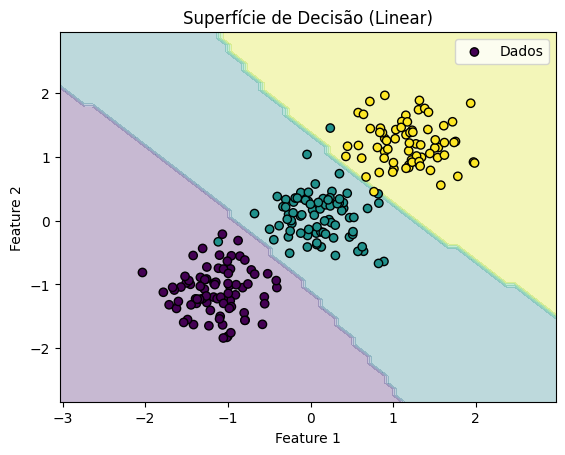

C:\Users\gleilsonpedro\AppData\Local\Temp\ipykernel_1696\3502608745.py:82: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, marker='x', edgecolor='k', label='Teste')


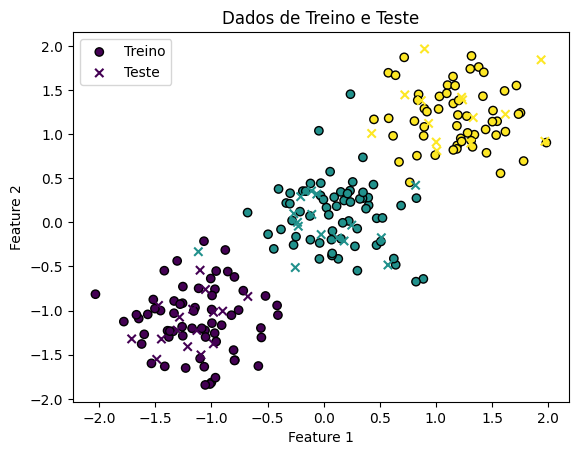

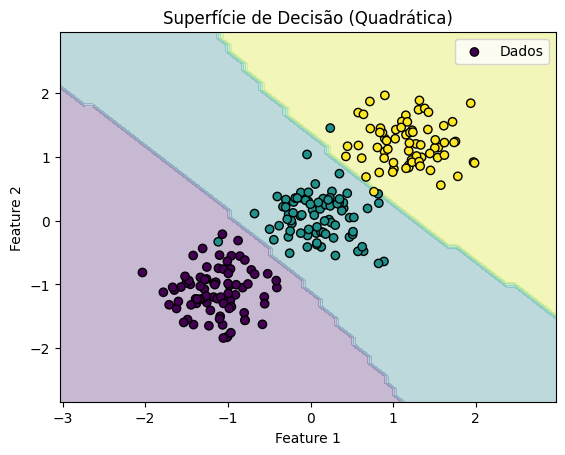

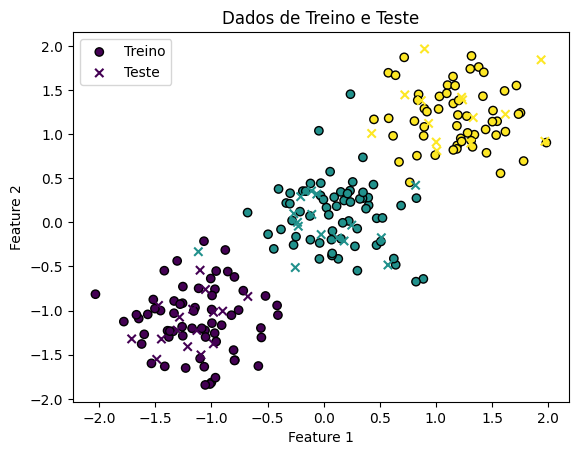

In [57]:


import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import StratifiedKFold

# Função para calcular a média e a matriz de covariância de cada classe
def calculate_class_statistics(X, y):
    class_means = []
    class_covariances = []
    for i in range(3):
        X_class = X[y == i]
        class_means.append(np.mean(X_class, axis=0))
        class_covariances.append(np.cov(X_class.T))
    return class_means, class_covariances

# Função para calcular a função discriminante linear
def linear_discriminant_function(x, class_mean, class_covariance):
    inv_covariance = np.linalg.inv(class_covariance)
    constant_term = -0.5 * np.dot(np.dot(class_mean.T, inv_covariance), class_mean)
    linear_term = np.dot(inv_covariance, x)
    return constant_term + np.dot(class_mean.T, linear_term)

# Função para calcular a função discriminante quadrática
def quadratic_discriminant_function(x, class_mean, class_covariance):
    inv_covariance = np.linalg.inv(class_covariance)
    det_covariance = np.linalg.det(class_covariance)
    constant_term = -0.5 * np.log(det_covariance)
    quadratic_term = -0.5 * np.dot(np.dot((x - class_mean).T, inv_covariance), (x - class_mean))
    return constant_term + quadratic_term

# Função para fazer previsões usando a função discriminante linear
def predict_linear(X, class_means, class_covariances, class_priors):
    predictions = []
    for x in X:
        discriminant_values = [linear_discriminant_function(x, class_means[i], class_covariances[i]) for i in range(3)]
        predictions.append(np.argmax(discriminant_values))
    return predictions

# Função para fazer previsões usando a função discriminante quadrática
def predict_quadratic(X, class_means, class_covariances, class_priors):
    predictions = []
    for x in X:
        discriminant_values = [quadratic_discriminant_function(x, class_means[i], class_covariances[i]) for i in range(3)]
        predictions.append(np.argmax(discriminant_values))
    return predictions

# Função para calcular métricas de classificação
def calculate_metrics(y_true, y_pred):
    accuracy = np.mean(y_true == y_pred)
    confusion_matrix = np.zeros((3, 3), dtype=int)
    for true, pred in zip(y_true, y_pred):
        confusion_matrix[true, pred] += 1
    std_dev_accuracy = np.std(y_true == y_pred)
    return accuracy, std_dev_accuracy, confusion_matrix

# Função para imprimir as matrizes de covariância
def print_covariance_matrices(class_covariances):
    print("\nMatrizes de Covariância das Classes:")
    for i, covariance in enumerate(class_covariances):
        print(f"Classe {i}:")
        print(covariance)
        print()

# Função para plotar a superfície de decisão
def plot_decision_surface(X, y, class_means, class_covariances, title):
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.1),
                           np.arange(x2_min, x2_max, 0.1))
    Z = np.array(predict_quadratic(np.c_[xx1.ravel(), xx2.ravel()], class_means, class_covariances, None)).reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, marker='o', edgecolor='k', label='Dados')
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.show()

# Função para plotar os dados de treino e teste
def plot_data(X_train, X_test, y_train, y_test):
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, marker='o', edgecolor='k', label='Treino')
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, marker='x', edgecolor='k', label='Teste')
    plt.title('Dados de Treino e Teste')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.show()

# Normalização dos dados
def normalize_data(X):
    X_normalized = (X - np.mean(X, axis=0)) / np.std(X, axis=0)
    return X_normalized

# Gerar dataset artificial
def generate_artificial_dataset():
    np.random.seed(42)
    class0 = np.random.multivariate_normal([1, 1], [[0.1, 0], [0, 0.1]], 80)
    class1 = np.random.multivariate_normal([2, 2], [[0.1, 0], [0, 0.1]], 80)
    class2 = np.random.multivariate_normal([3, 3], [[0.1, 0], [0, 0.1]], 70)
    X = np.vstack([class0, class1, class2])
    y = np.array([0]*80 + [1]*80 + [2]*70)
    return X, y

# Gerar conjunto de dados artificial
X, y = generate_artificial_dataset()

# Normalizar os dados
X_normalized = normalize_data(X)

# Holdout com 20 realizações
n_realizations = 20
accuracies_linear = []
std_devs_linear = []
confusion_matrices_linear = []

accuracies_quadratic = []
std_devs_quadratic = []
confusion_matrices_quadratic = []

for _ in range(n_realizations):
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    for train_index, test_index in skf.split(X_normalized, y):
        X_train, X_test = X_normalized[train_index], X_normalized[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # Calcular priors, médias e covariâncias de classe
        class_priors = np.bincount(y_train) / len(y_train)
        class_means_linear, class_covariances_linear = calculate_class_statistics(X_train, y_train)
        class_means_quadratic, class_covariances_quadratic = calculate_class_statistics(X_train, y_train)

        # Fazer previsões no conjunto de teste usando o discriminante linear
        y_pred_linear = predict_linear(X_test, class_means_linear, class_covariances_linear, class_priors)

        # Calcular métricas de classificação para o discriminante linear
        accuracy_linear, _, confusion_matrix_linear = calculate_metrics(y_test, y_pred_linear)
        accuracies_linear.append(accuracy_linear)
        confusion_matrices_linear.append(confusion_matrix_linear)

        # Fazer previsões no conjunto de teste usando o discriminante quadrático
        y_pred_quadratic = predict_quadratic(X_test, class_means_quadratic, class_covariances_quadratic, class_priors)

        # Calcular métricas de classificação para o discriminante quadrático
        accuracy_quadratic, _, confusion_matrix_quadratic = calculate_metrics(y_test, y_pred_quadratic)
        accuracies_quadratic.append(accuracy_quadratic)
        confusion_matrices_quadratic.append(confusion_matrix_quadratic)

# Calcular média e desvio padrão das acurácias
mean_accuracy_linear = np.mean(accuracies_linear)
mean_accuracy_quadratic = np.mean(accuracies_quadratic)

# Encontrar a melhor realização com base na acurácia mais próxima da média
best_realization_index_linear = np.argmax(accuracies_linear)
best_realization_index_quadratic = np.argmax(accuracies_quadratic)

# Imprimir resultados para o discriminante linear
print("\nResultados do Discriminante Linear:")
print("Dataset: Artificial\n")
print(f"Melhor Realização: {best_realization_index_linear}")
print(f"Acurácia Média: {mean_accuracy_linear:.4f}")
print("Matriz de Confusão:")
print(confusion_matrices_linear[best_realization_index_linear])

# Imprimir resultados para o discriminante quadrático
print("\nResultados do Discriminante Quadrático:")
print("Dataset: Artificial\n")
print(f"Melhor Realização: {best_realization_index_quadratic}")
print(f"Acurácia Média: {mean_accuracy_quadratic:.4f}")
print("Matriz de Confusão:")
print(confusion_matrices_quadratic[best_realization_index_quadratic])

# Imprimir matrizes de covariância
print_covariance_matrices(class_covariances_linear)

# Plotar superfície de decisão e dados de treino/teste para o discriminante linear
plot_decision_surface(X_normalized, y, class_means_linear, class_covariances_linear, 'Superfície de Decisão (Linear)')
plot_data(X_normalized[train_index], X_normalized[test_index], y[train_index], y[test_index])

# Plotar superfície de decisão e dados de treino/teste para o discriminante quadrático
plot_decision_surface(X_normalized, y, class_means_quadratic, class_covariances_quadratic, 'Superfície de Decisão (Quadrática)')
plot_data(X_normalized[train_index], X_normalized[test_index], y[train_index], y[test_index])
